In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime
from datetime import datetime
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams


import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline
sb.set_style('whitegrid')

C:\Users\liyak\anaconda3\envs\tf\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\liyak\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\liyak\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

- *Bank of America - BAC* 
- *Citi Group - C*
- *Goldmann Sachs - GS*
- *JP morgan - JPM*
- *Morgan Stanley - MS*
- *Wells Fargo - WFC*
- *Microsoft - MSFT*
- *Nike - NKE*
- *Walmart - WMT*
- *Tesla - TSLA*

In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC', 'NKE', 'WMT', 'TSLA', 'MSFT']
start = datetime(2017, 1, 1)
end = datetime.now()

In [4]:
BAC = web.DataReader('BAC', 'iex', start, end, api_key='pk_b77743aa4f624f5e8b85d589bb95ecbb')
C = web.DataReader('C', 'iex', start, end, api_key='pk_b77743aa4f624f5e8b85d589bb95ecbb')
GS = web.DataReader('GS', 'iex', start, end, api_key='pk_b77743aa4f624f5e8b85d589bb95ecbb')
JPM = web.DataReader('JPM', 'iex', start, end, api_key='pk_b77743aa4f624f5e8b85d589bb95ecbb')
MS = web.DataReader('MS', 'iex', start, end, api_key='pk_b77743aa4f624f5e8b85d589bb95ecbb')
WFC = web.DataReader('WFC', 'iex', start, end, api_key='pk_b77743aa4f624f5e8b85d589bb95ecbb')

In [5]:
NKE = web.DataReader('NKE', 'iex', start, end, api_key='pk_b77743aa4f624f5e8b85d589bb95ecbb')
WMT = web.DataReader('WMT', 'iex', start, end, api_key='pk_b77743aa4f624f5e8b85d589bb95ecbb')
TSLA = web.DataReader('TSLA', 'iex', start, end, api_key='pk_b77743aa4f624f5e8b85d589bb95ecbb')

In [6]:
MSFT = web.DataReader('MSFT', 'iex', start, end, api_key='pk_b77743aa4f624f5e8b85d589bb95ecbb')

In [7]:
stocks = pd.concat([BAC, C, GS, JPM, MS, WFC, NKE, WMT, TSLA, MSFT], axis=1, keys=tickers)
stocks

BAC                                         C                  \
             open     high      low  close    volume   open    high     low   
date                                                                          
2017-01-03  22.60  22.6800  22.2000  22.53  99298080  60.68  61.090  59.750   
2017-01-04  22.72  22.9600  22.6000  22.95  76875052  60.69  61.630  60.610   
2017-01-05  22.82  22.9300  22.3450  22.68  86826447  60.97  61.430  59.910   
2017-01-06  22.78  22.8500  22.5600  22.68  66281476  60.68  60.840  60.080   
2017-01-09  22.51  22.7100  22.4000  22.55  75901509  60.15  60.640  59.670   
...           ...      ...      ...    ...       ...    ...     ...     ...   
2023-02-17  35.08  35.3900  34.7450  35.35  28562699  51.26  51.585  50.915   
2023-02-21  34.91  35.0500  34.2700  34.52  37068852  50.74  50.910  49.430   
2023-02-22  34.36  34.5500  34.0700  34.29  38550421  49.89  50.480  49.370   
2023-02-23  34.40  34.6000  33.8594  34.26  28487971  50.34  50.620  49.695   
2023-02-24  33.86  34.2897  33.8400  34.21  27046643  50.00  50.340  49.650   

                               ...      TSLA                                \
            close      volume  ...      open      high       low     close   
date                           ...                                           
2017-01-03  60.59  18322398.0  ...   14.3240   14.6887   14.0640   14.4660   
2017-01-04  61.41  16947520.0  ...   14.3167   15.2000   14.2873   15.1327   
2017-01-05  60.34  18317911.0  ...   15.0947   15.1653   14.7967   15.1167   
2017-01-06  60.55  16778439.0  ...   15.1287   15.3540   15.0300   15.2673   
2017-01-09  60.22  14592998.0  ...   15.2647   15.4613   15.2000   15.4187   
...           ...         ...  ...       ...       ...       ...       ...   
2023-02-17  51.42  12297926.0  ...  199.9850  208.4400  197.5000  208.3100   
2023-02-21  49.84  22899167.0  ...  204.9900  209.7100  197.2200  197.3700   
2023-02-22  50.04  14431533.0  ...  197.9300  201.9900  191.7800  200.8600   
2023-02-23  50.38  12550656.0  ...  203.9100  205.1400  196.3300  202.0700   
2023-02-24  50.18  14547341.0  ...  196.3250  197.6695  192.8000  196.8800   

                           MSFT                                       
                 volume    open    high      low   close      volume  
date                                                                  
2017-01-03   88848810.0   62.79   62.84   62.125   62.58  20694101.0  
2017-01-04  168202065.0   62.48   62.75   62.120   62.30  21339969.0  
2017-01-05   88675425.0   62.19   62.66   62.030   62.30  24875968.0  
2017-01-06   82918395.0   62.30   63.15   62.040   62.84  19922919.0  
2017-01-09   59692260.0   62.76   63.08   62.540   62.64  20382730.0  
...                 ...     ...     ...      ...     ...         ...  
2023-02-17  213738549.0  259.39  260.09  256.000  258.06  30000055.0  
2023-02-21  180018588.0  254.48  255.49  251.590  252.67  28397444.0  
2023-02-22  191828457.0  254.09  254.34  250.340  251.51  22491056.0  
2023-02-23  146359950.0  255.56  256.84  250.480  254.77  29219095.0  
2023-02-24  142228105.0  249.96  251.00  248.100  249.22  24990905.0  

[1547 rows x 50 columns]

In [8]:
stocks.columns.names = ['Bank Stocks', 'Stocks Info']

In [9]:
stocks

Bank Stocks    BAC                                         C                  \
Stocks Info   open     high      low  close    volume   open    high     low   
date                                                                           
2017-01-03   22.60  22.6800  22.2000  22.53  99298080  60.68  61.090  59.750   
2017-01-04   22.72  22.9600  22.6000  22.95  76875052  60.69  61.630  60.610   
2017-01-05   22.82  22.9300  22.3450  22.68  86826447  60.97  61.430  59.910   
2017-01-06   22.78  22.8500  22.5600  22.68  66281476  60.68  60.840  60.080   
2017-01-09   22.51  22.7100  22.4000  22.55  75901509  60.15  60.640  59.670   
...            ...      ...      ...    ...       ...    ...     ...     ...   
2023-02-17   35.08  35.3900  34.7450  35.35  28562699  51.26  51.585  50.915   
2023-02-21   34.91  35.0500  34.2700  34.52  37068852  50.74  50.910  49.430   
2023-02-22   34.36  34.5500  34.0700  34.29  38550421  49.89  50.480  49.370   
2023-02-23   34.40  34.6000  33.8594  34.26  28487971  50.34  50.620  49.695   
2023-02-24   33.86  34.2897  33.8400  34.21  27046643  50.00  50.340  49.650   

Bank Stocks                     ...      TSLA                                \
Stocks Info  close      volume  ...      open      high       low     close   
date                            ...                                           
2017-01-03   60.59  18322398.0  ...   14.3240   14.6887   14.0640   14.4660   
2017-01-04   61.41  16947520.0  ...   14.3167   15.2000   14.2873   15.1327   
2017-01-05   60.34  18317911.0  ...   15.0947   15.1653   14.7967   15.1167   
2017-01-06   60.55  16778439.0  ...   15.1287   15.3540   15.0300   15.2673   
2017-01-09   60.22  14592998.0  ...   15.2647   15.4613   15.2000   15.4187   
...            ...         ...  ...       ...       ...       ...       ...   
2023-02-17   51.42  12297926.0  ...  199.9850  208.4400  197.5000  208.3100   
2023-02-21   49.84  22899167.0  ...  204.9900  209.7100  197.2200  197.3700   
2023-02-22   50.04  14431533.0  ...  197.9300  201.9900  191.7800  200.8600   
2023-02-23   50.38  12550656.0  ...  203.9100  205.1400  196.3300  202.0700   
2023-02-24   50.18  14547341.0  ...  196.3250  197.6695  192.8000  196.8800   

Bank Stocks                 MSFT                                       
Stocks Info       volume    open    high      low   close      volume  
date                                                                   
2017-01-03    88848810.0   62.79   62.84   62.125   62.58  20694101.0  
2017-01-04   168202065.0   62.48   62.75   62.120   62.30  21339969.0  
2017-01-05    88675425.0   62.19   62.66   62.030   62.30  24875968.0  
2017-01-06    82918395.0   62.30   63.15   62.040   62.84  19922919.0  
2017-01-09    59692260.0   62.76   63.08   62.540   62.64  20382730.0  
...                  ...     ...     ...      ...     ...         ...  
2023-02-17   213738549.0  259.39  260.09  256.000  258.06  30000055.0  
2023-02-21   180018588.0  254.48  255.49  251.590  252.67  28397444.0  
2023-02-22   191828457.0  254.09  254.34  250.340  251.51  22491056.0  
2023-02-23   146359950.0  255.56  256.84  250.480  254.77  29219095.0  
2023-02-24   142228105.0  249.96  251.00  248.100  249.22  24990905.0  

[1547 rows x 50 columns]

In [10]:
stocks.xs(key='close', axis=1, level='Stocks Info').max()

Bank Stocks
BAC      49.38
C        81.91
GS      423.85
JPM     171.78
MS      108.73
WFC      65.93
NKE     177.51
WMT     159.87
TSLA    409.97
MSFT    343.11
dtype: float64

In [11]:
np.array(stocks.xs(key='high', axis=1, level='Stocks Info').max())

array([ 50.11 ,  83.11 , 426.158, 172.96 , 109.73 ,  66.31 , 179.1  ,
       160.77 , 414.497, 349.67 ])

In [12]:
returns = DataFrame()

In [13]:
for ticks in tickers:
    returns[ticks + " Returns"] = stocks[ticks]['close'].pct_change()
returns.head()

BAC Returns  C Returns  GS Returns  JPM Returns  MS Returns  \
date                                                                      
2017-01-03          NaN        NaN         NaN          NaN         NaN   
2017-01-04     0.018642   0.013534    0.006458    -0.003668    0.013240   
2017-01-05    -0.011765  -0.017424   -0.007445    -0.009205   -0.009170   
2017-01-06     0.000000   0.003480    0.014835     0.000116    0.014577   
2017-01-09    -0.005732  -0.005450   -0.008207     0.000697   -0.025998   

            WFC Returns  NKE Returns  WMT Returns  TSLA Returns  MSFT Returns  
date                                                                           
2017-01-03          NaN          NaN          NaN           NaN           NaN  
2017-01-04     0.000893     0.020970     0.005826      0.046087     -0.004474  
2017-01-05    -0.015522    -0.000188     0.002172     -0.001057      0.000000  
2017-01-06    -0.002537     0.016020    -0.013726      0.009962      0.008668  
2017-01-09    -0.014535    -0.009831     0.006592      0.009917     -0.003183

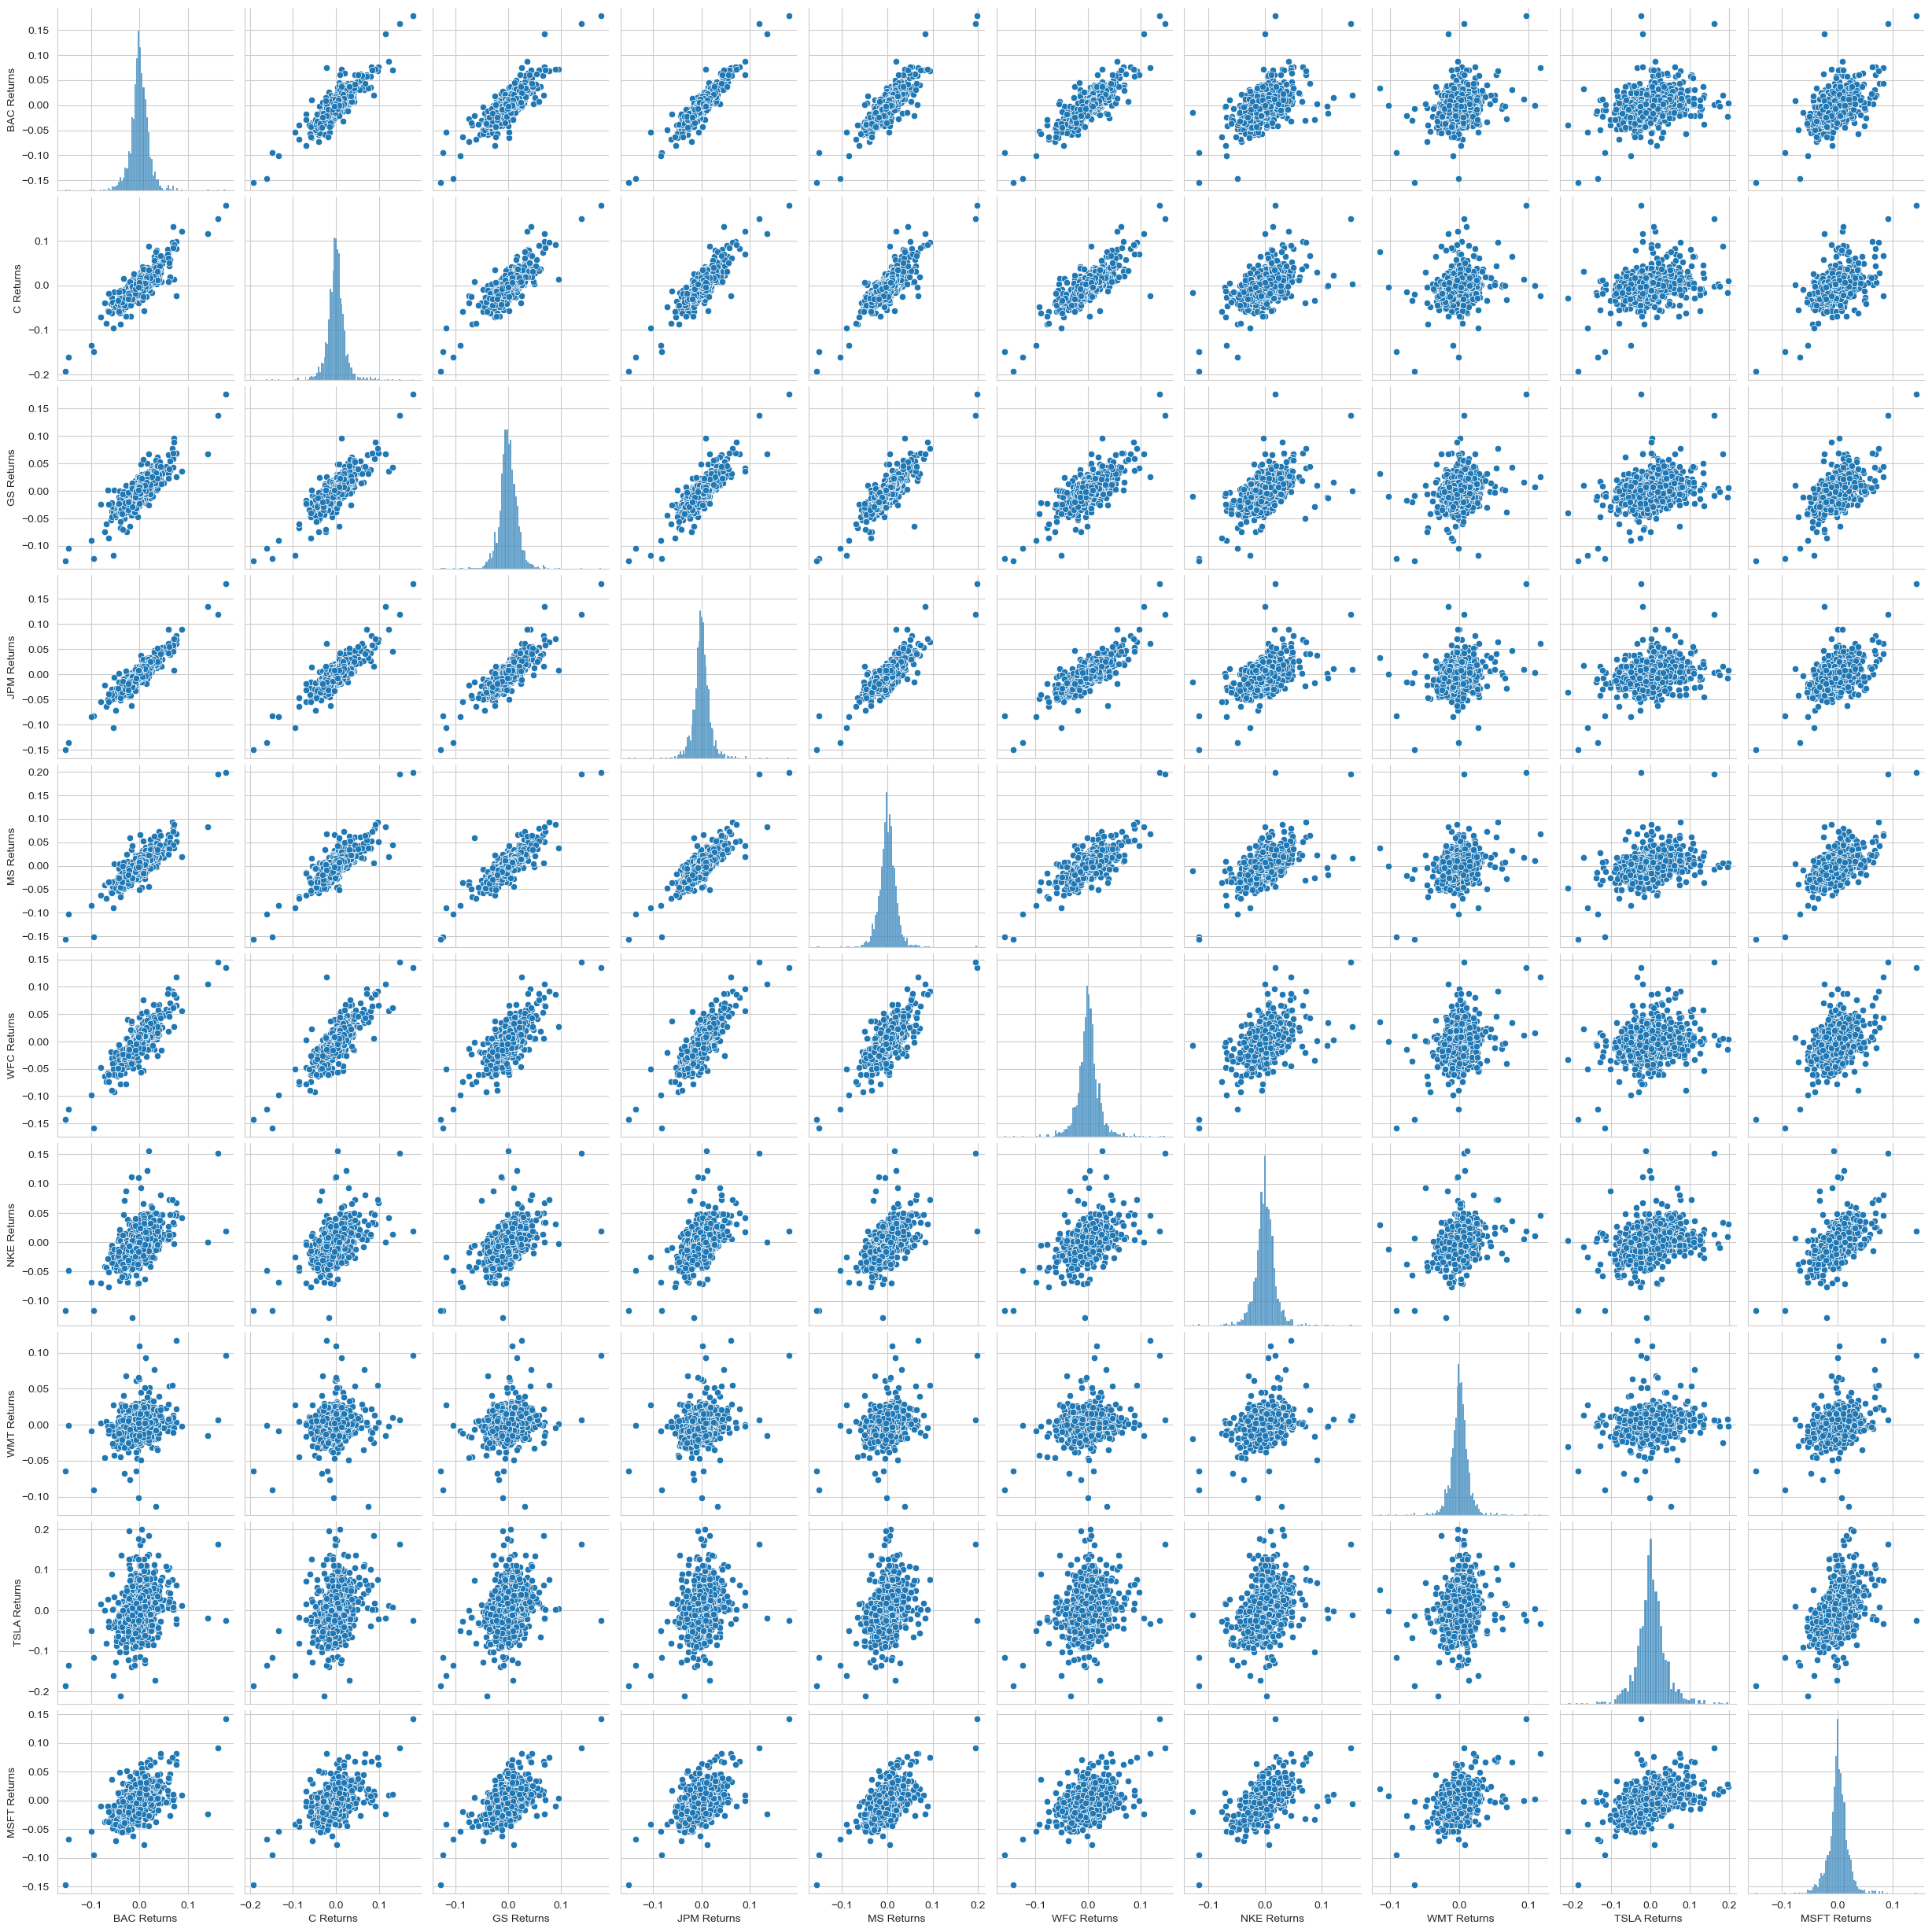

In [14]:
sb.pairplot(returns)

In [15]:
returns.idxmin()

BAC Returns     2020-03-16
C Returns       2020-03-16
GS Returns      2020-03-16
JPM Returns     2020-03-16
MS Returns      2020-03-16
WFC Returns     2020-03-12
NKE Returns     2022-09-30
WMT Returns     2022-05-17
TSLA Returns    2020-09-08
MSFT Returns    2020-03-16
dtype: object

In [16]:
returns.idxmax()

BAC Returns     2020-03-13
C Returns       2020-03-13
GS Returns      2020-03-13
JPM Returns     2020-03-13
MS Returns      2020-03-13
WFC Returns     2020-03-24
NKE Returns     2021-06-25
WMT Returns     2020-03-17
TSLA Returns    2020-02-03
MSFT Returns    2020-03-13
dtype: object

In [17]:
returns.std()

BAC Returns     0.020973
C Returns       0.022594
GS Returns      0.019606
JPM Returns     0.018792
MS Returns      0.020972
WFC Returns     0.021828
NKE Returns     0.019885
WMT Returns     0.014264
TSLA Returns    0.039051
MSFT Returns    0.018324
dtype: float64

In [18]:
import plotly
import cufflinks as cf
import chart_studio
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

cf.go_offline()
init_notebook_mode(connected=True)

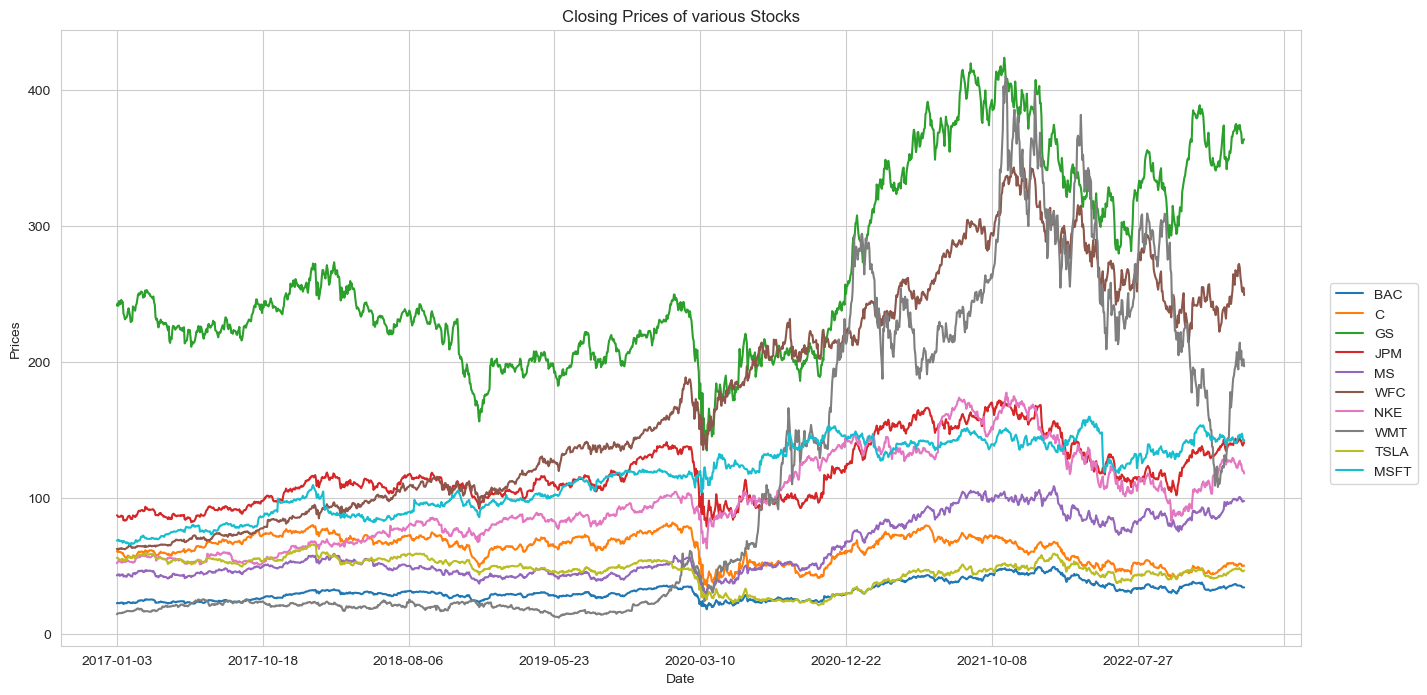

In [19]:
plt.figure(figsize=(16,8))
stocks['BAC']['close'].plot()
stocks['C']['close'].plot()
stocks['GS']['close'].plot()
stocks['JPM']['close'].plot()
stocks['MS']['close'].plot()
stocks['MSFT']['close'].plot()
stocks['NKE']['close'].plot()
stocks['TSLA']['close'].plot()
stocks['WFC']['close'].plot()
stocks['WMT']['close'].plot()
plt.title('Closing Prices of various Stocks')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend(tickers, bbox_to_anchor=[1, .5, .1, .1])
plt.show()

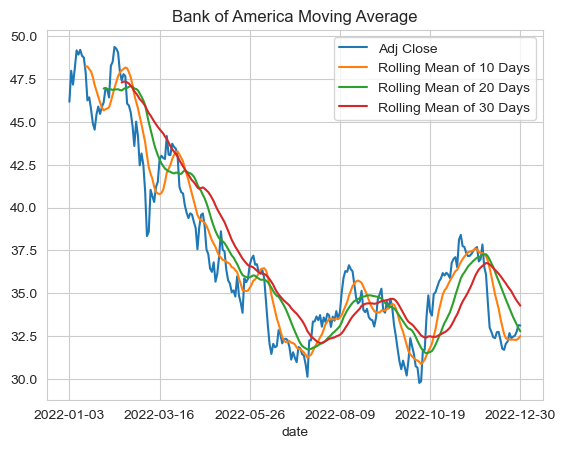

In [20]:
BAC['close']['2022-01-01':'2022-12-31'].plot(label='Adj Close')
BAC['close']['2022-01-01':'2022-12-31'].rolling(window=10).mean().plot(label='Rolling Mean of 10 Days')
BAC['close']['2022-01-01':'2022-12-31'].rolling(window=20).mean().plot(label='Rolling Mean of 20 Days')
BAC['close']['2022-01-01':'2022-12-31'].rolling(window=30).mean().plot(label='Rolling Mean of 30 Days')
plt.title('Bank of America Moving Average')
plt.legend()

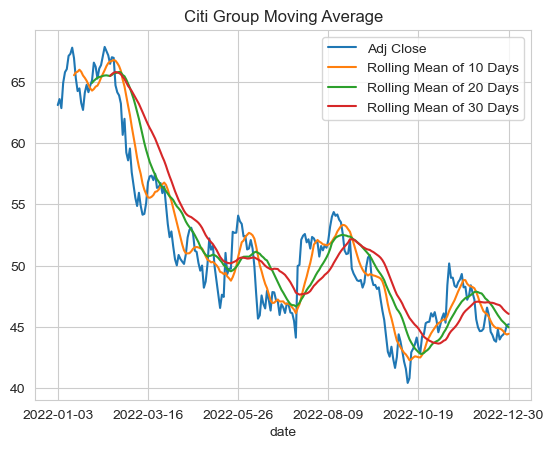

In [21]:
C['close']['2022-01-01':'2022-12-31'].plot(label='Adj Close')
C['close']['2022-01-01':'2022-12-31'].rolling(window=10).mean().plot(label='Rolling Mean of 10 Days')
C['close']['2022-01-01':'2022-12-31'].rolling(window=20).mean().plot(label='Rolling Mean of 20 Days')
C['close']['2022-01-01':'2022-12-31'].rolling(window=30).mean().plot(label='Rolling Mean of 30 Days')
plt.title('Citi Group Moving Average')
plt.legend()

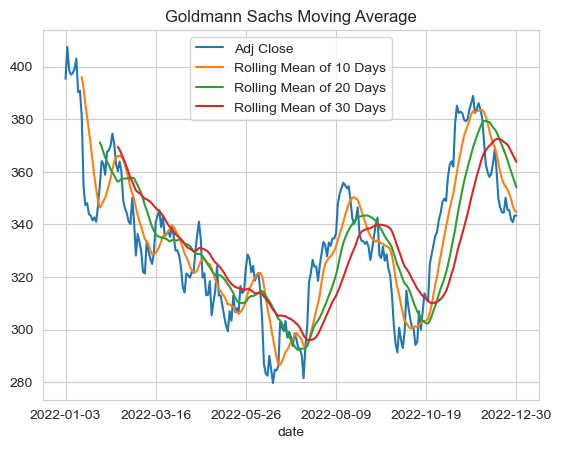

In [22]:
GS['close']['2022-01-01':'2022-12-31'].plot(label='Adj Close')
GS['close']['2022-01-01':'2022-12-31'].rolling(window=10).mean().plot(label='Rolling Mean of 10 Days')
GS['close']['2022-01-01':'2022-12-31'].rolling(window=20).mean().plot(label='Rolling Mean of 20 Days')
GS['close']['2022-01-01':'2022-12-31'].rolling(window=30).mean().plot(label='Rolling Mean of 30 Days')
plt.title('Goldmann Sachs Moving Average')
plt.legend()

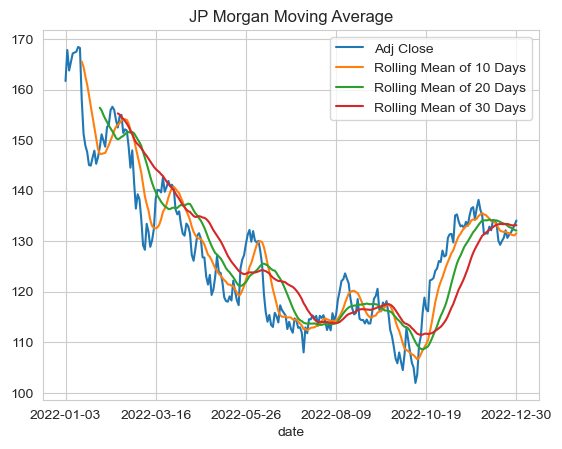

In [23]:
JPM['close']['2022-01-01':'2022-12-31'].plot(label='Adj Close')
JPM['close']['2022-01-01':'2022-12-31'].rolling(window=10).mean().plot(label='Rolling Mean of 10 Days')
JPM['close']['2022-01-01':'2022-12-31'].rolling(window=20).mean().plot(label='Rolling Mean of 20 Days')
JPM['close']['2022-01-01':'2022-12-31'].rolling(window=30).mean().plot(label='Rolling Mean of 30 Days')
plt.title('JP Morgan Moving Average')
plt.legend()

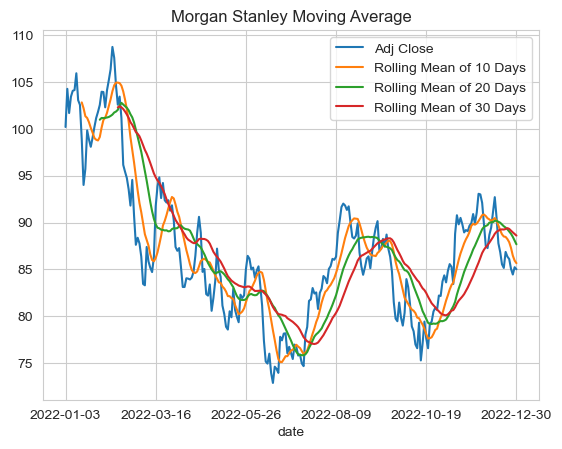

In [24]:
MS['close']['2022-01-01':'2022-12-31'].plot(label='Adj Close')
MS['close']['2022-01-01':'2022-12-31'].rolling(window=10).mean().plot(label='Rolling Mean of 10 Days')
MS['close']['2022-01-01':'2022-12-31'].rolling(window=20).mean().plot(label='Rolling Mean of 20 Days')
MS['close']['2022-01-01':'2022-12-31'].rolling(window=30).mean().plot(label='Rolling Mean of 30 Days')
plt.title('Morgan Stanley Moving Average')
plt.legend()

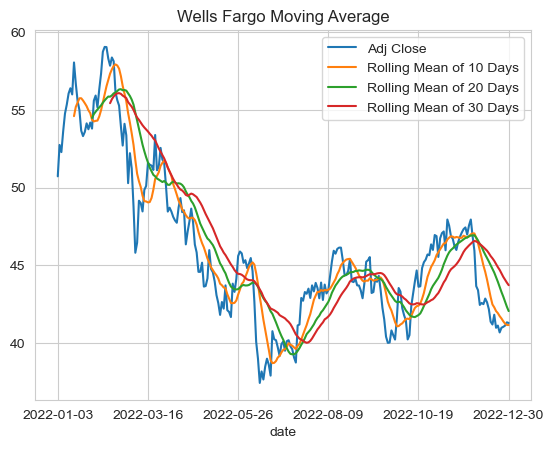

In [25]:
WFC['close']['2022-01-01':'2022-12-31'].plot(label='Adj Close')
WFC['close']['2022-01-01':'2022-12-31'].rolling(window=10).mean().plot(label='Rolling Mean of 10 Days')
WFC['close']['2022-01-01':'2022-12-31'].rolling(window=20).mean().plot(label='Rolling Mean of 20 Days')
WFC['close']['2022-01-01':'2022-12-31'].rolling(window=30).mean().plot(label='Rolling Mean of 30 Days')
plt.title('Wells Fargo Moving Average')
plt.legend()

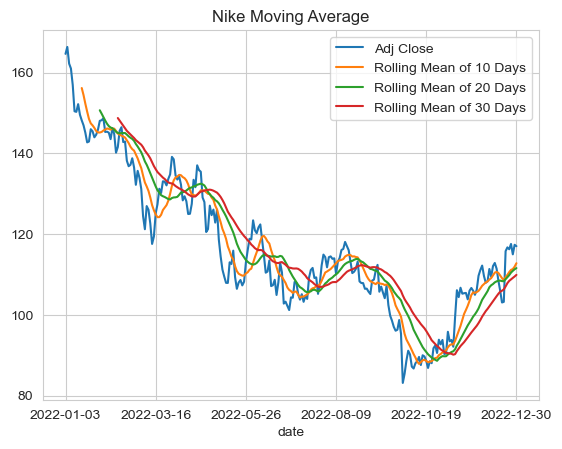

In [26]:
NKE['close']['2022-01-01':'2022-12-31'].plot(label='Adj Close')
NKE['close']['2022-01-01':'2022-12-31'].rolling(window=10).mean().plot(label='Rolling Mean of 10 Days')
NKE['close']['2022-01-01':'2022-12-31'].rolling(window=20).mean().plot(label='Rolling Mean of 20 Days')
NKE['close']['2022-01-01':'2022-12-31'].rolling(window=30).mean().plot(label='Rolling Mean of 30 Days')
plt.title('Nike Moving Average')
plt.legend()

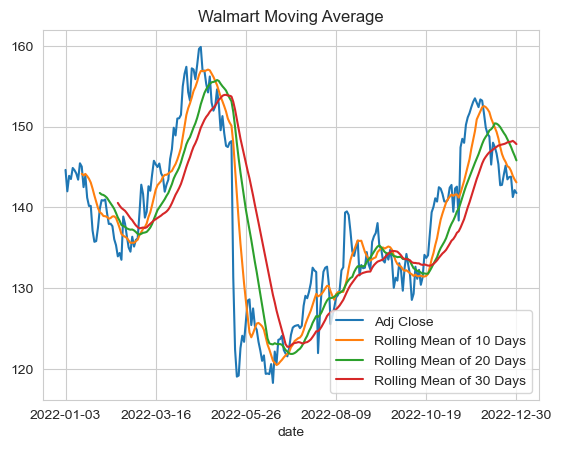

In [27]:
WMT['close']['2022-01-01':'2022-12-31'].plot(label='Adj Close')
WMT['close']['2022-01-01':'2022-12-31'].rolling(window=10).mean().plot(label='Rolling Mean of 10 Days')
WMT['close']['2022-01-01':'2022-12-31'].rolling(window=20).mean().plot(label='Rolling Mean of 20 Days')
WMT['close']['2022-01-01':'2022-12-31'].rolling(window=30).mean().plot(label='Rolling Mean of 30 Days')
plt.title('Walmart Moving Average')
plt.legend()

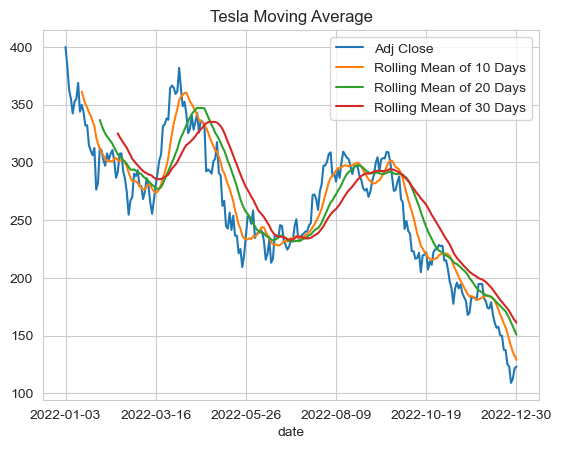

In [28]:
TSLA['close']['2022-01-01':'2022-12-31'].plot(label='Adj Close')
TSLA['close']['2022-01-01':'2022-12-31'].rolling(window=10).mean().plot(label='Rolling Mean of 10 Days')
TSLA['close']['2022-01-01':'2022-12-31'].rolling(window=20).mean().plot(label='Rolling Mean of 20 Days')
TSLA['close']['2022-01-01':'2022-12-31'].rolling(window=30).mean().plot(label='Rolling Mean of 30 Days')
plt.title('Tesla Moving Average')
plt.legend()

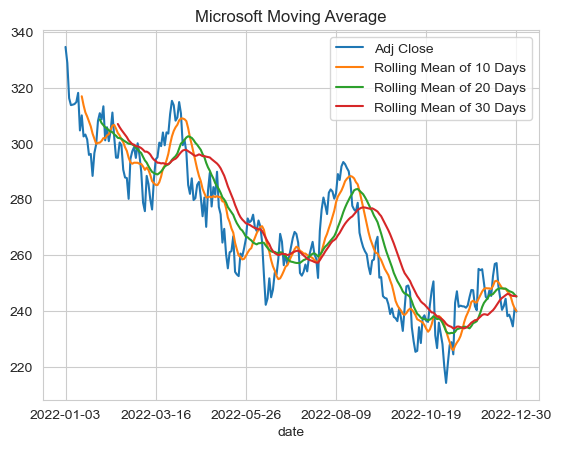

In [29]:
MSFT['close']['2022-01-01':'2022-12-31'].plot(label='Adj Close')
MSFT['close']['2022-01-01':'2022-12-31'].rolling(window=10).mean().plot(label='Rolling Mean of 10 Days')
MSFT['close']['2022-01-01':'2022-12-31'].rolling(window=20).mean().plot(label='Rolling Mean of 20 Days')
MSFT['close']['2022-01-01':'2022-12-31'].rolling(window=30).mean().plot(label='Rolling Mean of 30 Days')
plt.title('Microsoft Moving Average')
plt.legend()

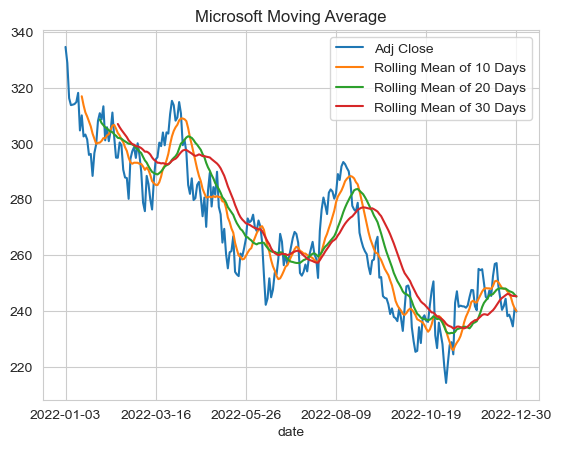

In [30]:
MSFT['close']['2022-01-01':'2022-12-31'].plot(label='Adj Close')
MSFT['close']['2022-01-01':'2022-12-31'].rolling(window=10).mean().plot(label='Rolling Mean of 10 Days')
MSFT['close']['2022-01-01':'2022-12-31'].rolling(window=20).mean().plot(label='Rolling Mean of 20 Days')
MSFT['close']['2022-01-01':'2022-12-31'].rolling(window=30).mean().plot(label='Rolling Mean of 30 Days')
plt.title('Microsoft Moving Average')
plt.legend()

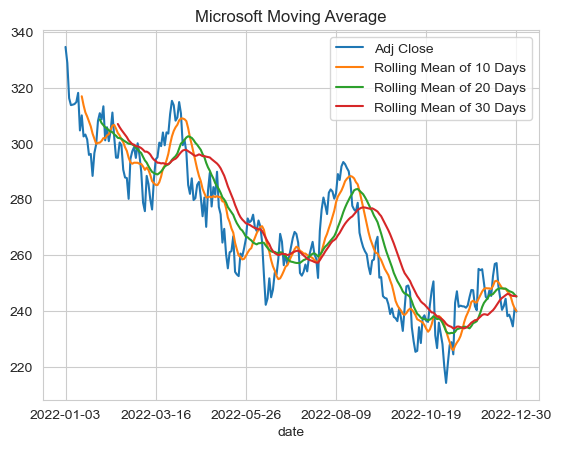

In [31]:
MSFT['close']['2022-01-01':'2022-12-31'].plot(label='Adj Close')
MSFT['close']['2022-01-01':'2022-12-31'].rolling(window=10).mean().plot(label='Rolling Mean of 10 Days')
MSFT['close']['2022-01-01':'2022-12-31'].rolling(window=20).mean().plot(label='Rolling Mean of 20 Days')
MSFT['close']['2022-01-01':'2022-12-31'].rolling(window=30).mean().plot(label='Rolling Mean of 30 Days')
plt.title('Microsoft Moving Average')
plt.legend()

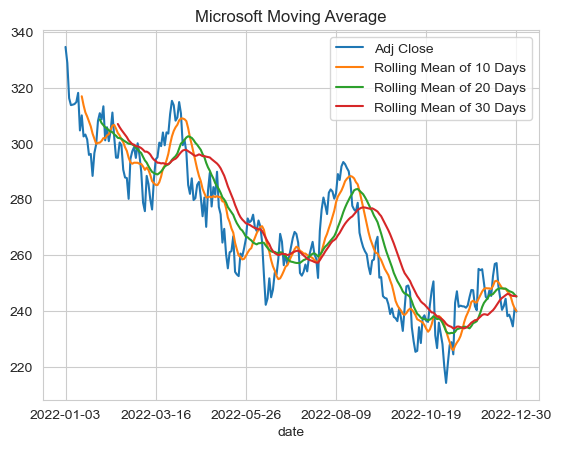

In [32]:
MSFT['close']['2022-01-01':'2022-12-31'].plot(label='Adj Close')
MSFT['close']['2022-01-01':'2022-12-31'].rolling(window=10).mean().plot(label='Rolling Mean of 10 Days')
MSFT['close']['2022-01-01':'2022-12-31'].rolling(window=20).mean().plot(label='Rolling Mean of 20 Days')
MSFT['close']['2022-01-01':'2022-12-31'].rolling(window=30).mean().plot(label='Rolling Mean of 30 Days')
plt.title('Microsoft Moving Average')
plt.legend()

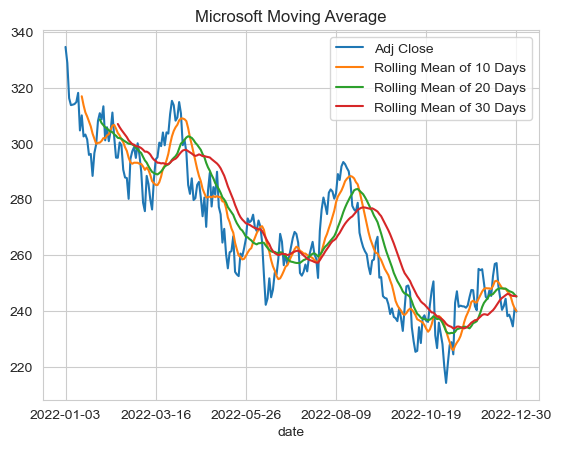

In [33]:
MSFT['close']['2022-01-01':'2022-12-31'].plot(label='Adj Close')
MSFT['close']['2022-01-01':'2022-12-31'].rolling(window=10).mean().plot(label='Rolling Mean of 10 Days')
MSFT['close']['2022-01-01':'2022-12-31'].rolling(window=20).mean().plot(label='Rolling Mean of 20 Days')
MSFT['close']['2022-01-01':'2022-12-31'].rolling(window=30).mean().plot(label='Rolling Mean of 30 Days')
plt.title('Microsoft Moving Average')
plt.legend()

In [34]:
returns.dropna()

BAC Returns  C Returns  GS Returns  JPM Returns  MS Returns  \
date                                                                      
2017-01-04     0.018642   0.013534    0.006458    -0.003668    0.013240   
2017-01-05    -0.011765  -0.017424   -0.007445    -0.009205   -0.009170   
2017-01-06     0.000000   0.003480    0.014835     0.000116    0.014577   
2017-01-09    -0.005732  -0.005450   -0.008207     0.000697   -0.025998   
2017-01-10     0.017295   0.000166   -0.001317     0.002901    0.008195   
...                 ...        ...         ...          ...         ...   
2023-02-17     0.001984  -0.000777   -0.004592     0.002962   -0.000603   
2023-02-21    -0.023479  -0.030727   -0.020027    -0.018349   -0.018993   
2023-02-22    -0.006663   0.004013   -0.000637    -0.007663   -0.003585   
2023-02-23    -0.000875   0.006795    0.007343     0.008011    0.006888   
2023-02-24    -0.001459  -0.003970    0.000853     0.009021   -0.002450   

            WFC Returns  NKE Returns  WMT Returns  TSLA Returns  MSFT Returns  
date                                                                           
2017-01-04     0.000893     0.020970     0.005826      0.046087     -0.004474  
2017-01-05    -0.015522    -0.000188     0.002172     -0.001057      0.000000  
2017-01-06    -0.002537     0.016020    -0.013726      0.009962      0.008668  
2017-01-09    -0.014535    -0.009831     0.006592      0.009917     -0.003183  
2017-01-10     0.007006    -0.005058    -0.006986     -0.006096     -0.000319  
...                 ...          ...          ...           ...           ...  
2023-02-17     0.005718     0.003698     0.015041      0.031033     -0.015602  
2023-02-21    -0.026321    -0.029958     0.006078     -0.052518     -0.020887  
2023-02-22    -0.004974    -0.009909    -0.020973      0.017683     -0.004591  
2023-02-23     0.005216     0.000500    -0.014906      0.006024      0.012962  
2023-02-24     0.008000    -0.016005     0.002674     -0.025684     -0.021784  

[1546 rows x 10 columns]

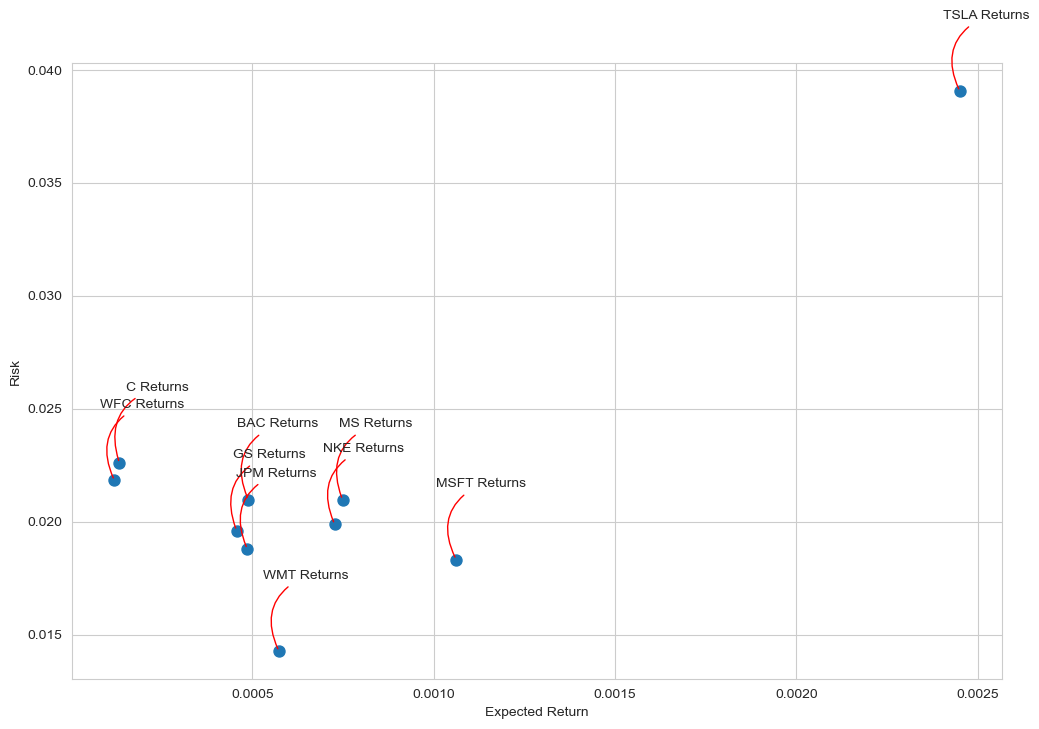

In [35]:
rets = returns.dropna()

area = np.pi * 20

plt.figure(figsize=(12, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right',
                va='bottom', arrowprops=dict(arrowstyle='-', color='red', connectionstyle='arc3,rad=.5'))

## Predicting the closing price of Bank of america

In [36]:
BAC

open     high      low  close    volume
date                                                
2017-01-03  22.60  22.6800  22.2000  22.53  99298080
2017-01-04  22.72  22.9600  22.6000  22.95  76875052
2017-01-05  22.82  22.9300  22.3450  22.68  86826447
2017-01-06  22.78  22.8500  22.5600  22.68  66281476
2017-01-09  22.51  22.7100  22.4000  22.55  75901509
...           ...      ...      ...    ...       ...
2023-02-17  35.08  35.3900  34.7450  35.35  28562699
2023-02-21  34.91  35.0500  34.2700  34.52  37068852
2023-02-22  34.36  34.5500  34.0700  34.29  38550421
2023-02-23  34.40  34.6000  33.8594  34.26  28487971
2023-02-24  33.86  34.2897  33.8400  34.21  27046643

[1547 rows x 5 columns]

In [37]:
# plt.figure(figsize=(12, 6))
# plt.title('Bank of America Closing History', fontsize=17)
# BAC['close'].plot()
# plt.xticks(rotation=60)
# plt.xlabel('Date', fontsize=13.5)
# plt.ylabel('Closing price', fontsize=13.5)
# plt.show()

In [38]:
# bac_close_df = BAC.filter(['close'])
# bac_close_vals = bac_close_df.values
# bac_training_len = int(np.ceil(len(BAC)) * .95)
# bac_training_len

In [39]:
# scaler = MinMaxScaler()
# bac_scaled_data = scaler.fit_transform(bac_close_vals)
# bac_scaled_data

In [40]:
# train_data = bac_scaled_data[:int(bac_training_len), :]

# x_train = []
# y_train = []

# for i in range(60, len(train_data)):
#     x_train.append(train_data[i - 60: i, 0])
#     y_train.append(train_data[i, 0])
#     if i <= 61:
#         print('X_train set: ', x_train)
#         print('y_train_set: ', y_train)


# x_train, y_train = np.array(x_train), np.array(y_train)

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [41]:
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1))) # Input Layer
# model.add(LSTM(64, return_sequences=False)) # Hidden Layer
# model.add(Dropout(.3))
# model.add(Dense(25)) # Hidden Layer
# model.add(Dropout(.3))
# model.add(Dense(1)) # Output Layer

# model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit(x_train, y_train, batch_size=10, epochs=150, verbose=1)

In [42]:
# test_data = bac_scaled_data[bac_training_len - 60:, :]

# x_test = []
# y_test = bac_close_vals[bac_training_len: , :]
# for i in range(60, len(test_data)):
#     x_test.append(test_data[i - 60 : i, 0])

# x_test = np.array(x_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)


# rsme = np.sqrt(mean_squared_error(y_test, predictions))
# rsme


In [43]:
# train = bac_close_df[:bac_training_len]
# valid = bac_close_df[bac_training_len:]
# valid['Predictions'] = predictions

In [44]:
# plt.figure(figsize=(16, 6))
# plt.title('Bank of America Predictions', fontsize=17)
# plt.xlabel('Date', fontsize=13.5)
# plt.ylabel('Closing price', fontsize=13.5)
# plt.plot(np.asarray(train.index, dtype='datetime64[s]') ,train['close'])
# plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['close'])
# plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['Predictions'])
# plt.legend(['Train', 'Valid', 'Predictions'])
# plt.show()

## Predicting the closing price of Citigroup

In [45]:
C

open    high     low  close      volume
date                                                
2017-01-03  60.68  61.090  59.750  60.59  18322398.0
2017-01-04  60.69  61.630  60.610  61.41  16947520.0
2017-01-05  60.97  61.430  59.910  60.34  18317911.0
2017-01-06  60.68  60.840  60.080  60.55  16778439.0
2017-01-09  60.15  60.640  59.670  60.22  14592998.0
...           ...     ...     ...    ...         ...
2023-02-17  51.26  51.585  50.915  51.42  12297926.0
2023-02-21  50.74  50.910  49.430  49.84  22899167.0
2023-02-22  49.89  50.480  49.370  50.04  14431533.0
2023-02-23  50.34  50.620  49.695  50.38  12550656.0
2023-02-24  50.00  50.340  49.650  50.18  14547341.0

[1547 rows x 5 columns]

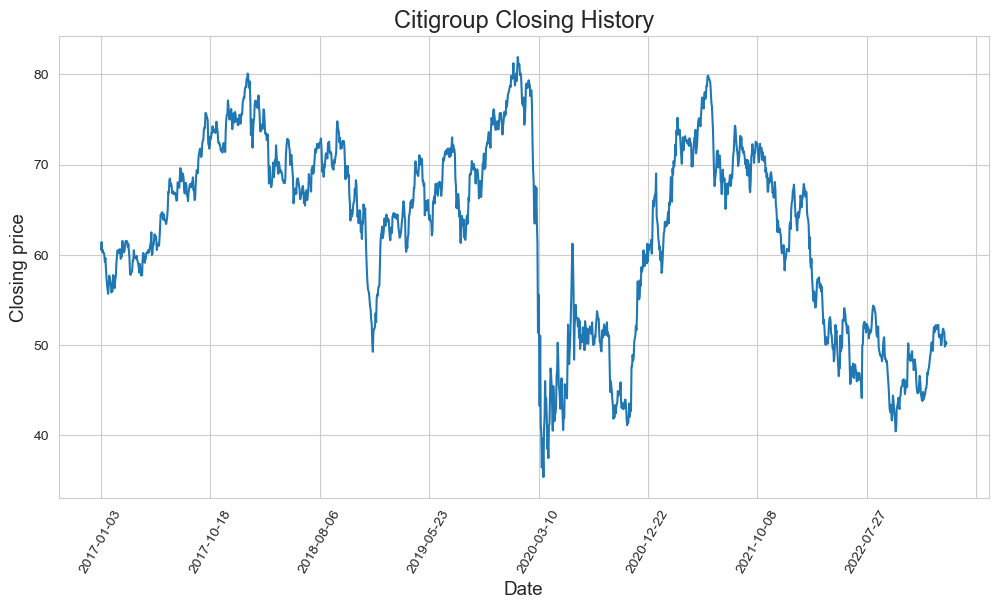

In [46]:
# plt.figure(figsize=(12, 6))
# plt.title('Citigroup Closing History', fontsize=17)
# C['close'].plot()
# plt.xticks(rotation=60)
# plt.xlabel('Date', fontsize=13.5)
# plt.ylabel('Closing price', fontsize=13.5)
# plt.show()

In [47]:
# c_close_df = C.filter(['close'])
# c_close_vals = c_close_df.values
# c_training_len = int(np.ceil(len(C)) * .95)
# c_training_len

1469

In [48]:
# scaler = MinMaxScaler()
# c_scaled_data = scaler.fit_transform(c_close_vals)
# c_scaled_data

array([[0.54170249],
       [0.55932932],
       [0.53632846],
       ...,
       [0.31491831],
       [0.322227  ],
       [0.31792777]])

In [49]:
# train_data = c_scaled_data[:int(c_training_len), :]

# x_train = []
# y_train = []

# for i in range(60, len(train_data)):
#     x_train.append(train_data[i - 60: i, 0])
#     y_train.append(train_data[i, 0])
#     if i <= 61:
#         print('X_train set: ', x_train)
#         print('y_train_set: ', y_train)


# x_train, y_train = np.array(x_train), np.array(y_train)

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

X_train set:  [array([0.54170249, 0.55932932, 0.53632846, 0.54084265, 0.53374893,
       0.53396389, 0.52815993, 0.51246776, 0.52106621, 0.49419604,
       0.47291488, 0.4572227 , 0.44539983, 0.43615649, 0.45894239,
       0.47936371, 0.47226999, 0.46689596, 0.45614789, 0.43938091,
       0.44411006, 0.44260533, 0.48086844, 0.47828891, 0.46861565,
       0.44991402, 0.47012038, 0.47807395, 0.50644884, 0.52536543,
       0.53976784, 0.53718831, 0.53267412, 0.54084265, 0.54234738,
       0.54234738, 0.51956148, 0.5294497 , 0.52493551, 0.56212382,
       0.54256234, 0.55051591, 0.53503869, 0.53976784, 0.55288048,
       0.56233878, 0.56104901, 0.56190886, 0.5599742 , 0.54707653,
       0.55374033, 0.53697334, 0.52020636, 0.48688736, 0.4810834 ,
       0.48710232, 0.48753224, 0.49312124, 0.51655202, 0.51590714])]
y_train_set:  [0.5399828030954428]
X_train set:  [array([0.54170249, 0.55932932, 0.53632846, 0.54084265, 0.53374893,
       0.53396389, 0.52815993, 0.51246776, 0.52106621, 0.49419

(1409, 60, 1)

In [50]:
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1))) # Input Layer
# model.add(LSTM(64, return_sequences=False)) # Hidden Layer
# model.add(Dropout(.3))
# model.add(Dense(25)) # Hidden Layer
# model.add(Dropout(.3))
# model.add(Dense(1)) # Output Layer

# model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit(x_train, y_train, batch_size=10, epochs=150, verbose=1)

Epoch 1/150
141/141 [==============================] - 12s 22ms/step - loss: 0.0270
Epoch 2/150
141/141 [==============================] - 3s 22ms/step - loss: 0.0154
Epoch 3/150
141/141 [==============================] - 3s 21ms/step - loss: 0.0108
Epoch 4/150
141/141 [==============================] - 3s 22ms/step - loss: 0.0097
Epoch 5/150
141/141 [==============================] - 3s 21ms/step - loss: 0.0090
Epoch 6/150
141/141 [==============================] - 3s 20ms/step - loss: 0.0077
Epoch 7/150
141/141 [==============================] - 3s 21ms/step - loss: 0.0070
Epoch 8/150
141/141 [==============================] - 3s 20ms/step - loss: 0.0064
Epoch 9/150
141/141 [==============================] - 3s 23ms/step - loss: 0.0062
Epoch 10/150
141/141 [==============================] - 3s 21ms/step - loss: 0.0056
Epoch 11/150
141/141 [==============================] - 3s 21ms/step - loss: 0.0050
Epoch 12/150
141/141 [==============================] - 3s 21ms/step - loss: 0.0052


In [51]:
# test_data = c_scaled_data[c_training_len - 60:, :]

# x_test = []
# y_test = c_close_vals[c_training_len: , :]
# for i in range(60, len(test_data)):
#     x_test.append(test_data[i - 60 : i, 0])

# x_test = np.array(x_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)


# rsme = np.sqrt(mean_squared_error(y_test, predictions))
# rsme


3/3 [==============================] - 1s 8ms/step


0.8187608269205142

In [52]:
# train = c_close_df[:c_training_len]
# valid = c_close_df[c_training_len:]
# valid['Predictions'] = predictions

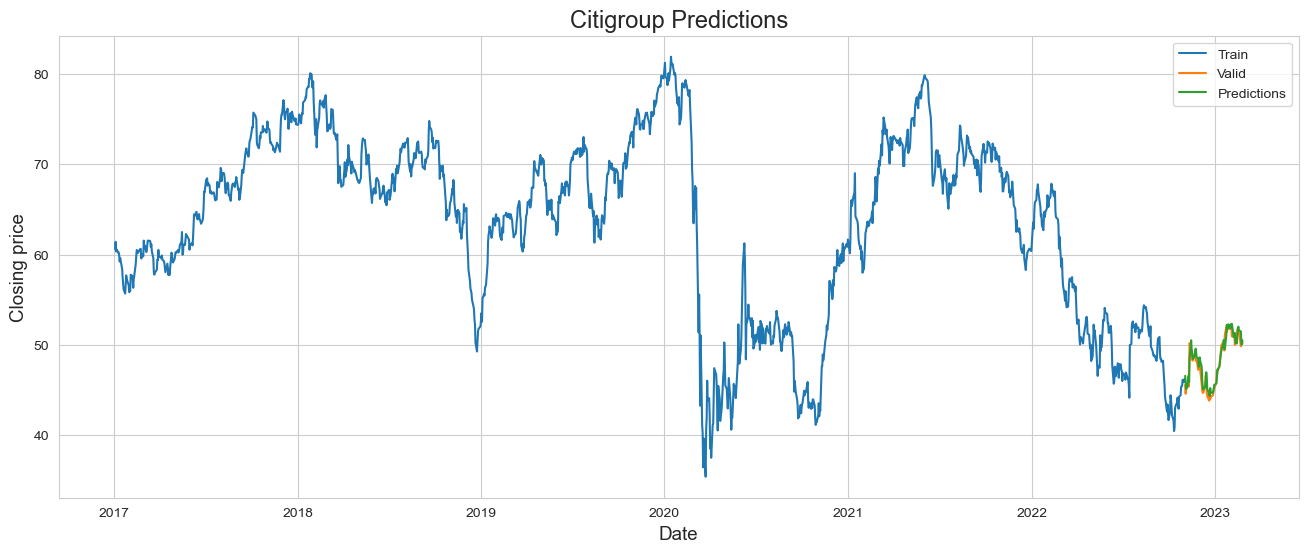

In [53]:
# plt.figure(figsize=(16, 6))
# plt.title('Citigroup Predictions', fontsize=17)
# plt.xlabel('Date', fontsize=13.5)
# plt.ylabel('Closing price', fontsize=13.5)
# plt.plot(np.asarray(train.index, dtype='datetime64[s]') ,train['close'])
# plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['close'])
# plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['Predictions'])
# plt.legend(['Train', 'Valid', 'Predictions'])
# plt.show()

## Predicting for Goldmann Sachs

In [60]:
GS

open     high      low   close   volume
date                                                 
2017-01-03  242.70  244.970  237.970  241.57  4384246
2017-01-04  241.44  243.320  240.030  243.13  2728709
2017-01-05  242.72  243.232  236.780  241.32  3562618
2017-01-06  242.29  246.200  241.370  244.90  3591079
2017-01-09  243.25  244.690  241.470  242.89  3022766
...            ...      ...      ...     ...      ...
2023-02-17  368.05  371.060  366.860  368.50  1857335
2023-02-21  366.72  366.720  360.090  361.12  2403029
2023-02-22  361.63  363.000  358.041  360.89  2203940
2023-02-23  363.20  367.880  359.610  363.54  1931502
2023-02-24  360.17  365.180  359.530  363.85  2428661

[1547 rows x 5 columns]

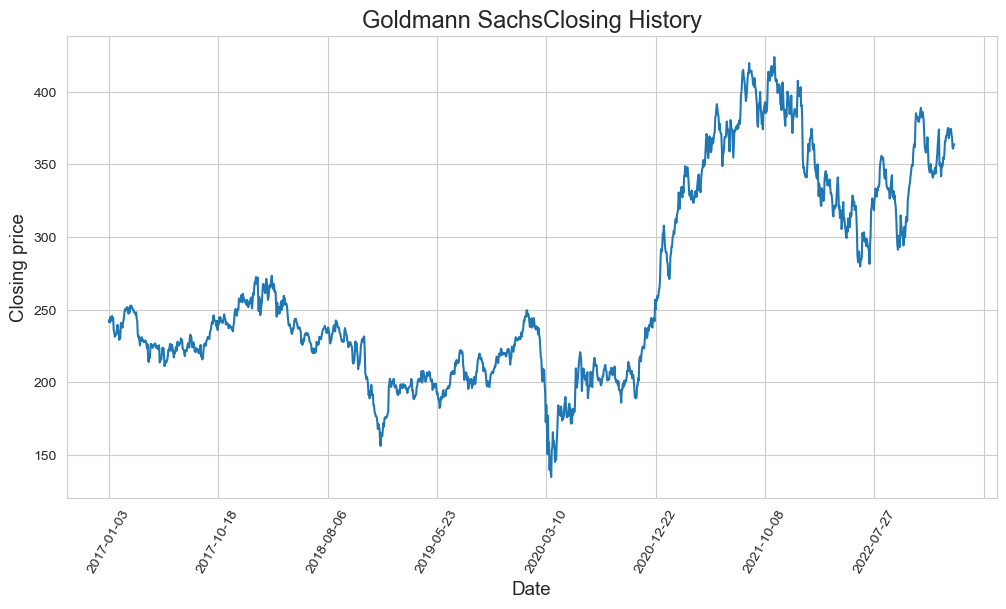

In [61]:
# plt.figure(figsize=(12, 6))
# plt.title('Goldmann SachsClosing History', fontsize=17)
# GS['close'].plot()
# plt.xticks(rotation=60)
# plt.xlabel('Date', fontsize=13.5)
# plt.ylabel('Closing price', fontsize=13.5)
# plt.show()

In [62]:
# gs_close_df = GS.filter(['close'])
# gs_close_vals = gs_close_df.values
# gs_training_len = int(np.ceil(len(GS)) * .95)
# gs_training_len

1469

In [63]:
# scaler = MinMaxScaler()
# gs_scaled_data = scaler.fit_transform(gs_close_vals)
# gs_scaled_data

array([[0.36901135],
       [0.37441152],
       [0.36814594],
       ...,
       [0.78205483],
       [0.79122819],
       [0.7923013 ]])

In [64]:
# train_data = gs_scaled_data[:int(gs_training_len), :]

# x_train = []
# y_train = []

# for i in range(60, len(train_data)):
#     x_train.append(train_data[i - 60: i, 0])
#     y_train.append(train_data[i, 0])
#     if i <= 61:
#         print('X_train set: ', x_train)
#         print('y_train_set: ', y_train)


# x_train, y_train = np.array(x_train), np.array(y_train)

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

X_train set:  [array([0.36901135, 0.37441152, 0.36814594, 0.38053863, 0.37358073,
       0.372473  , 0.38351565, 0.37686929, 0.37846164, 0.34882996,
       0.34381058, 0.33384104, 0.33657574, 0.33820271, 0.34169898,
       0.35405705, 0.36212268, 0.35301855, 0.34246054, 0.3266062 ,
       0.33127942, 0.3303794 , 0.36686513, 0.36350734, 0.36226115,
       0.35571864, 0.36894212, 0.37299225, 0.38528109, 0.39632373,
       0.40006231, 0.3962545 , 0.39950845, 0.40428552, 0.40418167,
       0.40231238, 0.38901966, 0.39587372, 0.39147743, 0.40757408,
       0.40186236, 0.40819718, 0.40515093, 0.4013085 , 0.39902382,
       0.39881612, 0.39258516, 0.39182359, 0.39030047, 0.38704652,
       0.39203129, 0.37721545, 0.37098449, 0.33934506, 0.33266408,
       0.33553725, 0.32345611, 0.31331349, 0.32664082, 0.32359457])]
y_train_set:  [0.33318332871780665]
X_train set:  [array([0.36901135, 0.37441152, 0.36814594, 0.38053863, 0.37358073,
       0.372473  , 0.38351565, 0.37686929, 0.37846164, 0.3488

(1409, 60, 1)

In [65]:
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1))) # Input Layer
# model.add(LSTM(64, return_sequences=False)) # Hidden Layer
# model.add(Dropout(.3))
# model.add(Dense(25)) # Hidden Layer
# model.add(Dropout(.3))
# model.add(Dense(1)) # Output Layer

# model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit(x_train, y_train, batch_size=10, epochs=150, verbose=1)

Epoch 1/150
141/141 [==============================] - 7s 24ms/step - loss: 0.0169
Epoch 2/150
141/141 [==============================] - 3s 23ms/step - loss: 0.0083
Epoch 3/150
141/141 [==============================] - 3s 23ms/step - loss: 0.0069
Epoch 4/150
141/141 [==============================] - 3s 24ms/step - loss: 0.0059
Epoch 5/150
141/141 [==============================] - 3s 24ms/step - loss: 0.0055
Epoch 6/150
141/141 [==============================] - 3s 23ms/step - loss: 0.0045
Epoch 7/150
141/141 [==============================] - 4s 25ms/step - loss: 0.0045
Epoch 8/150
141/141 [==============================] - 3s 24ms/step - loss: 0.0042
Epoch 9/150
141/141 [==============================] - 3s 23ms/step - loss: 0.0040
Epoch 10/150
141/141 [==============================] - 3s 23ms/step - loss: 0.0035
Epoch 11/150
141/141 [==============================] - 3s 23ms/step - loss: 0.0036
Epoch 12/150
141/141 [==============================] - 3s 25ms/step - loss: 0.0032
E

In [66]:
# test_data = gs_scaled_data[gs_training_len - 60:, :]

# x_test = []
# y_test = gs_close_vals[gs_training_len: , :]
# for i in range(60, len(test_data)):
#     x_test.append(test_data[i - 60 : i, 0])

# x_test = np.array(x_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)


# rsme = np.sqrt(mean_squared_error(y_test, predictions))
# rsme


3/3 [==============================] - 1s 11ms/step


11.00751746473568

In [69]:
# train = gs_close_df[:gs_training_len]
# valid = gs_close_df[gs_training_len:]
# valid['Predictions'] = predictions

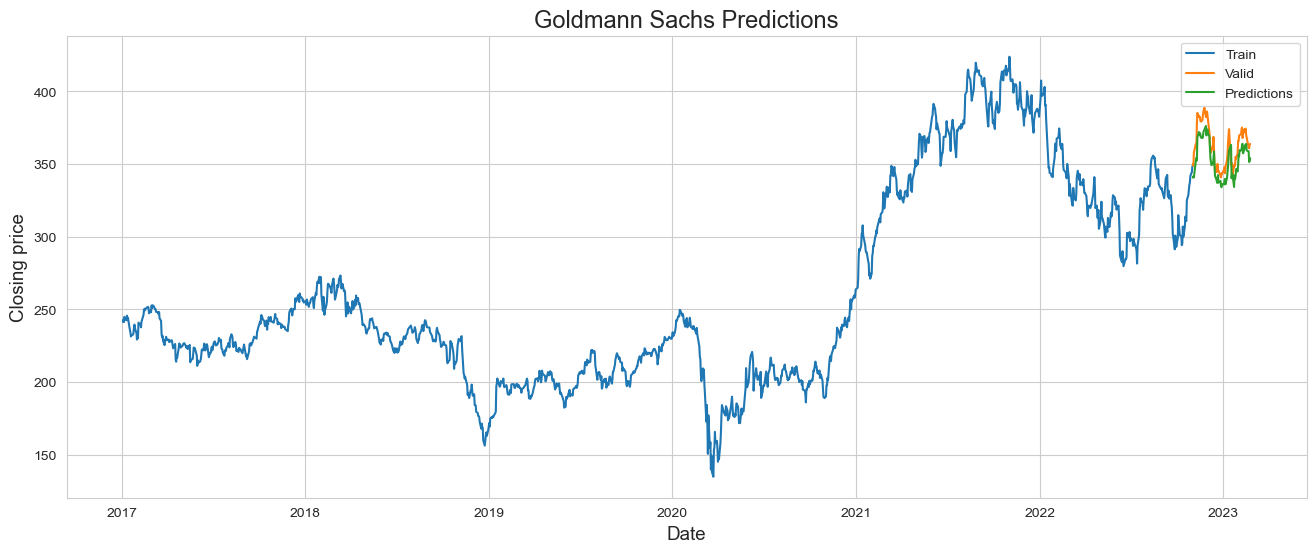

In [70]:
# plt.figure(figsize=(16, 6))
# plt.title('Goldmann Sachs Predictions', fontsize=17)
# plt.xlabel('Date', fontsize=13.5)
# plt.ylabel('Closing price', fontsize=13.5)
# plt.plot(np.asarray(train.index, dtype='datetime64[s]') ,train['close'])
# plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['close'])
# plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['Predictions'])
# plt.legend(['Train', 'Valid', 'Predictions'])
# plt.show()

## Predicting for JP morgan

In [73]:
JPM

open    high       low   close    volume
date                                                  
2017-01-03   87.34   87.76   85.9800   87.23  20550714
2017-01-04   86.96   87.18   86.4000   86.91  15266596
2017-01-05   86.81   87.11   85.2589   86.11  14300816
2017-01-06   86.39   86.62   85.9400   86.12  12893298
2017-01-09   85.73   86.77   85.5200   86.18  12806609
...            ...     ...       ...     ...       ...
2023-02-17  140.98  142.83  140.0700  142.24   7948829
2023-02-21  140.69  141.34  138.7500  139.63   9996283
2023-02-22  138.92  139.43  137.4350  138.56  11107501
2023-02-23  138.73  140.17  137.9400  139.67   8068010
2023-02-24  139.11  141.36  138.9300  140.93   9126888

[1547 rows x 5 columns]

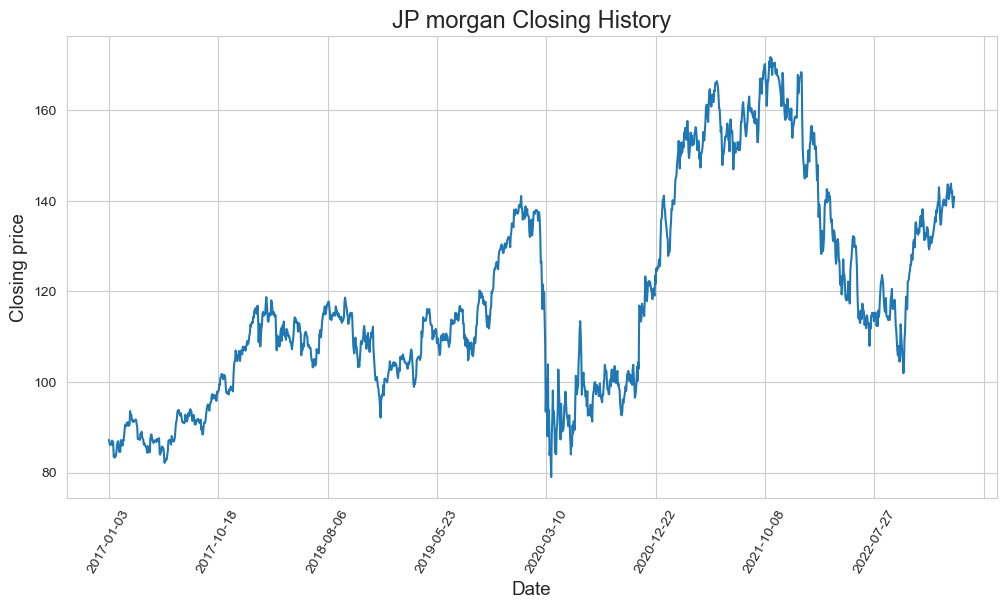

In [75]:
# plt.figure(figsize=(12, 6))
# plt.title('JP morgan Closing History', fontsize=17)
# JPM['close'].plot()
# plt.xticks(rotation=60)
# plt.xlabel('Date', fontsize=13.5)
# plt.ylabel('Closing price', fontsize=13.5)
# plt.show()

In [76]:
# jpm_close_df = JPM.filter(['close'])
# jpm_close_vals = jpm_close_df.values
# jpm_training_len = int(np.ceil(len(JPM)) * .95)
# jpm_training_len

1469

In [77]:
# scaler = MinMaxScaler()
# jpm_scaled_data = scaler.fit_transform(jpm_close_vals)
# jpm_scaled_data

array([[0.0884097 ],
       [0.08495957],
       [0.07633423],
       ...,
       [0.64183288],
       [0.65380054],
       [0.66738544]])

In [78]:
# train_data = jpm_scaled_data[:int(jpm_training_len), :]

# x_train = []
# y_train = []

# for i in range(60, len(train_data)):
#     x_train.append(train_data[i - 60: i, 0])
#     y_train.append(train_data[i, 0])
#     if i <= 61:
#         print('X_train set: ', x_train)
#         print('y_train_set: ', y_train)


# x_train, y_train = np.array(x_train), np.array(y_train)

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

X_train set:  [array([0.0884097 , 0.08495957, 0.07633423, 0.07644205, 0.07708895,
       0.07978437, 0.08679245, 0.07773585, 0.08269542, 0.04873315,
       0.05293801, 0.04603774, 0.05002695, 0.05045822, 0.06134771,
       0.0754717 , 0.0832345 , 0.0851752 , 0.0754717 , 0.06037736,
       0.06382749, 0.05994609, 0.08787062, 0.08345013, 0.08291105,
       0.07471698, 0.08808625, 0.08592992, 0.09832884, 0.113531  ,
       0.12463612, 0.12398922, 0.12075472, 0.12916442, 0.1297035 ,
       0.13045822, 0.12183288, 0.12291105, 0.12495957, 0.15708895,
       0.14134771, 0.14846361, 0.13897574, 0.13347709, 0.13132075,
       0.13520216, 0.13207547, 0.13293801, 0.13455526, 0.13692722,
       0.13595687, 0.12560647, 0.11859838, 0.09013477, 0.0916442 ,
       0.09013477, 0.0890566 , 0.08851752, 0.10318059, 0.09962264])]
y_train_set:  [0.10781671159029649]
X_train set:  [array([0.0884097 , 0.08495957, 0.07633423, 0.07644205, 0.07708895,
       0.07978437, 0.08679245, 0.07773585, 0.08269542, 0.0487

(1409, 60, 1)

In [79]:
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1))) # Input Layer
# model.add(LSTM(64, return_sequences=False)) # Hidden Layer
# model.add(Dropout(.3))
# model.add(Dense(25)) # Hidden Layer
# model.add(Dropout(.3))
# model.add(Dense(1)) # Output Layer

# model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit(x_train, y_train, batch_size=10, epochs=150, verbose=1)

Epoch 1/150
141/141 [==============================] - 4s 15ms/step - loss: 0.0201
Epoch 2/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0106
Epoch 3/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0087
Epoch 4/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0062
Epoch 5/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0056
Epoch 6/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0051
Epoch 7/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0049
Epoch 8/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0053
Epoch 9/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0040
Epoch 10/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0040
Epoch 11/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0041
Epoch 12/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0037
E

In [80]:
# test_data = jpm_scaled_data[jpm_training_len - 60:, :]

# x_test = []
# y_test = jpm_close_vals[jpm_training_len: , :]
# for i in range(60, len(test_data)):
#     x_test.append(test_data[i - 60 : i, 0])

# x_test = np.array(x_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)


# rsme = np.sqrt(mean_squared_error(y_test, predictions))
# rsme


3/3 [==============================] - 1s 6ms/step


1.6340917003750957

In [81]:
# train = jpm_close_df[:jpm_training_len]
# valid = jpm_close_df[jpm_training_len:]
# valid['Predictions'] = predictions

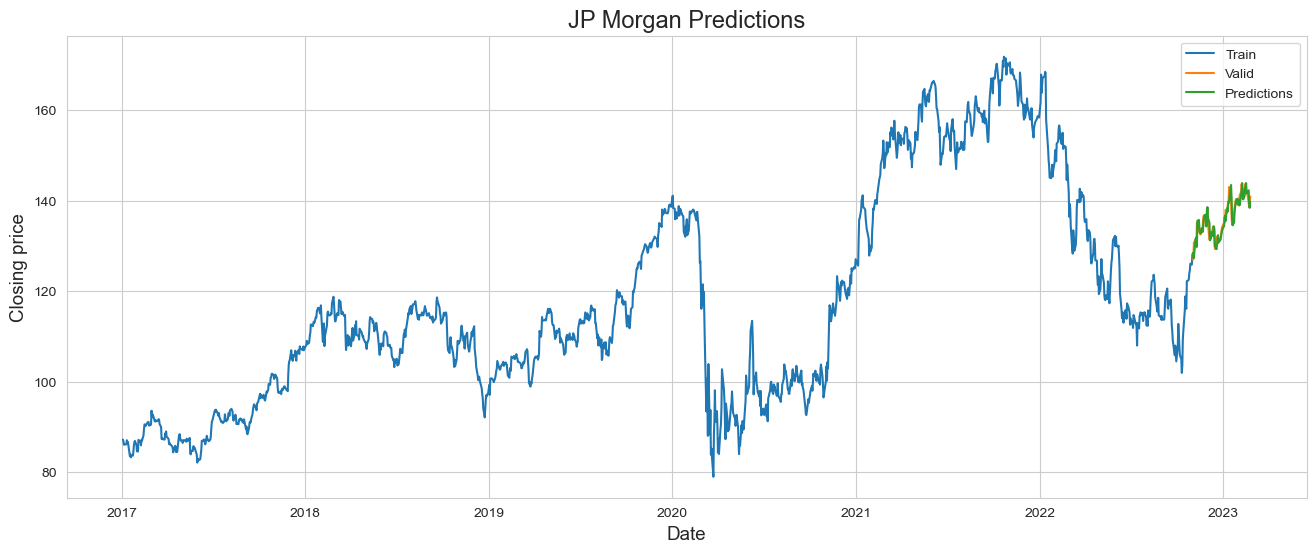

In [82]:
# plt.figure(figsize=(16, 6))
# plt.title('JP Morgan Predictions', fontsize=17)
# plt.xlabel('Date', fontsize=13.5)
# plt.ylabel('Closing price', fontsize=13.5)
# plt.plot(np.asarray(train.index, dtype='datetime64[s]') ,train['close'])
# plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['close'])
# plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['Predictions'])
# plt.legend(['Train', 'Valid', 'Predictions'])
# plt.show()

## Prediciting for Morgan Stanley

In [83]:
MS

open    high     low  close      volume
date                                                
2017-01-03  43.09   43.63  42.450  43.05   8316914.0
2017-01-04  43.30   43.82  43.040  43.62   7747375.0
2017-01-05  43.53   43.63  42.190  43.22   9883202.0
2017-01-06  43.56   44.13  43.180  43.85   9152750.0
2017-01-09  43.49   43.54  42.680  42.71  11104032.0
...           ...     ...     ...    ...         ...
2023-02-17  98.90  100.02  98.300  99.51   8133018.0
2023-02-21  98.46   99.00  97.175  97.62   6555987.0
2023-02-22  97.37   98.07  96.620  97.27   5072435.0
2023-02-23  97.88   98.42  96.700  97.94   5916140.0
2023-02-24  97.15   97.98  96.610  97.70   5414234.0

[1547 rows x 5 columns]

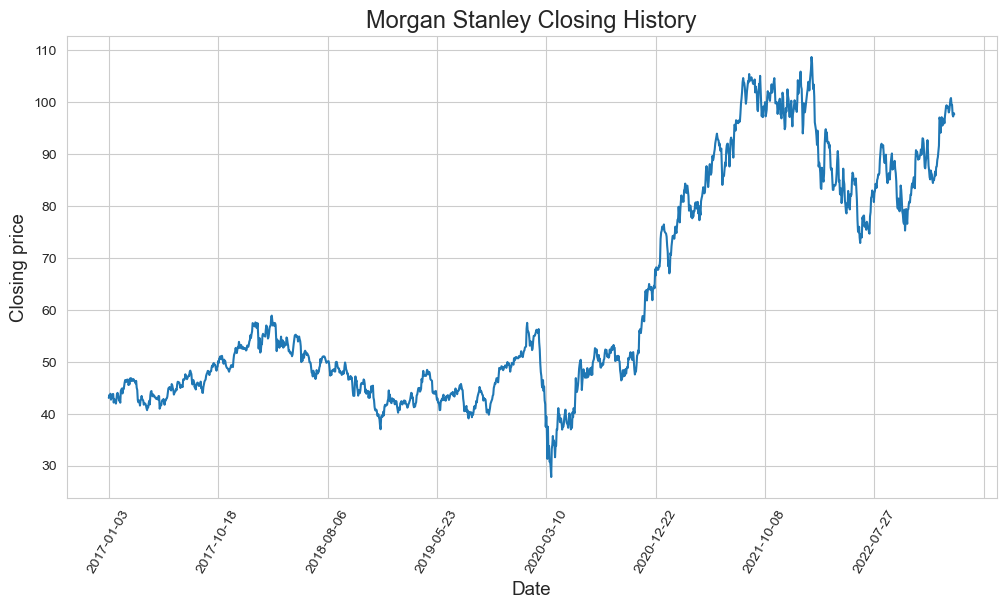

In [84]:
# plt.figure(figsize=(12, 6))
# plt.title('Morgan Stanley Closing History', fontsize=17)
# MS['close'].plot()
# plt.xticks(rotation=60)
# plt.xlabel('Date', fontsize=13.5)
# plt.ylabel('Closing price', fontsize=13.5)
# plt.show()

In [85]:
# ms_close_df = MS.filter(['close'])
# ms_close_vals = ms_close_df.values
# ms_training_len = int(np.ceil(len(MS)) * .95)
# ms_training_len

1469

In [86]:
# scaler = MinMaxScaler()
# ms_scaled_data = scaler.fit_transform(ms_close_vals)
# ms_scaled_data

array([[0.18833416],
       [0.19537815],
       [0.190435  ],
       ...,
       [0.85837865],
       [0.86665843],
       [0.86369254]])

In [87]:
# train_data = ms_scaled_data[:int(ms_training_len), :]

# x_train = []
# y_train = []

# for i in range(60, len(train_data)):
#     x_train.append(train_data[i - 60: i, 0])
#     y_train.append(train_data[i, 0])
#     if i <= 61:
#         print('X_train set: ', x_train)
#         print('y_train_set: ', y_train)


# x_train, y_train = np.array(x_train), np.array(y_train)

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

X_train set:  [array([0.18833416, 0.19537815, 0.190435  , 0.19822046, 0.18413248,
       0.18845774, 0.19599605, 0.19550173, 0.19772615, 0.17721206,
       0.18598616, 0.18091943, 0.18264953, 0.17486406, 0.18437963,
       0.19834404, 0.2003213 , 0.19574889, 0.18919921, 0.18141374,
       0.1840089 , 0.1769649 , 0.20538804, 0.20785961, 0.21082551,
       0.19896194, 0.21057835, 0.20872467, 0.21564508, 0.22528423,
       0.23084528, 0.22614928, 0.2266436 , 0.23171033, 0.23121602,
       0.23195749, 0.21898171, 0.22281265, 0.22071181, 0.2347998 ,
       0.22825012, 0.23504696, 0.23183391, 0.22886802, 0.22960949,
       0.23319328, 0.23084528, 0.22800297, 0.22713791, 0.22293623,
       0.22886802, 0.21267919, 0.2073653 , 0.18351458, 0.17795353,
       0.18264953, 0.18104301, 0.17016807, 0.18141374, 0.18524469])]
y_train_set:  [0.19303015323776568]
X_train set:  [array([0.18833416, 0.19537815, 0.190435  , 0.19822046, 0.18413248,
       0.18845774, 0.19599605, 0.19550173, 0.19772615, 0.1772

(1409, 60, 1)

In [88]:
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1))) # Input Layer
# model.add(LSTM(64, return_sequences=False)) # Hidden Layer
# model.add(Dropout(.3))
# model.add(Dense(25)) # Hidden Layer
# model.add(Dropout(.3))
# model.add(Dense(1)) # Output Layer

# model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit(x_train, y_train, batch_size=10, epochs=150, verbose=1)

Epoch 1/150
141/141 [==============================] - 4s 15ms/step - loss: 0.0168
Epoch 2/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0088
Epoch 3/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0068
Epoch 4/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0056
Epoch 5/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0049
Epoch 6/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0045
Epoch 7/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0045
Epoch 8/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0041
Epoch 9/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0044
Epoch 10/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0035
Epoch 11/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0034
Epoch 12/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0033
E

In [89]:
# test_data = ms_scaled_data[ms_training_len - 60:, :]

# x_test = []
# y_test = ms_close_vals[ms_training_len: , :]
# for i in range(60, len(test_data)):
#     x_test.append(test_data[i - 60 : i, 0])

# x_test = np.array(x_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)


# rsme = np.sqrt(mean_squared_error(y_test, predictions))
# rsme


3/3 [==============================] - 1s 8ms/step


1.540202462445351

In [90]:
# train = ms_close_df[:ms_training_len]
# valid = ms_close_df[ms_training_len:]
# valid['Predictions'] = predictions

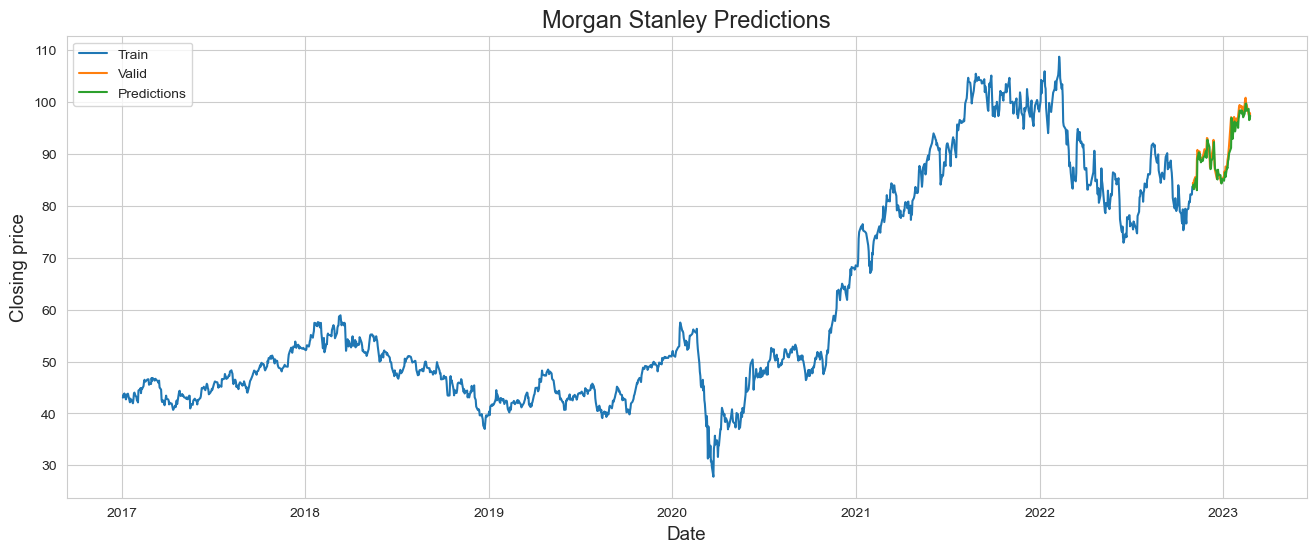

In [91]:
# plt.figure(figsize=(16, 6))
# plt.title('Morgan Stanley Predictions', fontsize=17)
# plt.xlabel('Date', fontsize=13.5)
# plt.ylabel('Closing price', fontsize=13.5)
# plt.plot(np.asarray(train.index, dtype='datetime64[s]') ,train['close'])
# plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['close'])
# plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['Predictions'])
# plt.legend(['Train', 'Valid', 'Predictions'])
# plt.show()

## Predicting for Wells fargo

In [92]:
WFC

open     high     low  close    volume
date                                                
2017-01-03  55.670  56.3500  55.460  56.00  22063790
2017-01-04  56.160  56.3071  55.611  56.05  15036148
2017-01-05  55.490  55.8200  54.475  55.18  18831628
2017-01-06  55.260  55.5660  54.700  55.04  18715908
2017-01-09  54.680  54.8100  54.180  54.24  21794061
...            ...      ...     ...    ...       ...
2023-02-17  47.085  47.5700  47.020  47.49  13463805
2023-02-21  47.070  47.0700  45.970  46.24  13652656
2023-02-22  45.950  46.2300  45.685  46.01  13402927
2023-02-23  46.120  46.4400  45.785  46.25  14783579
2023-02-24  45.840  46.7600  45.695  46.62  16040295

[1547 rows x 5 columns]

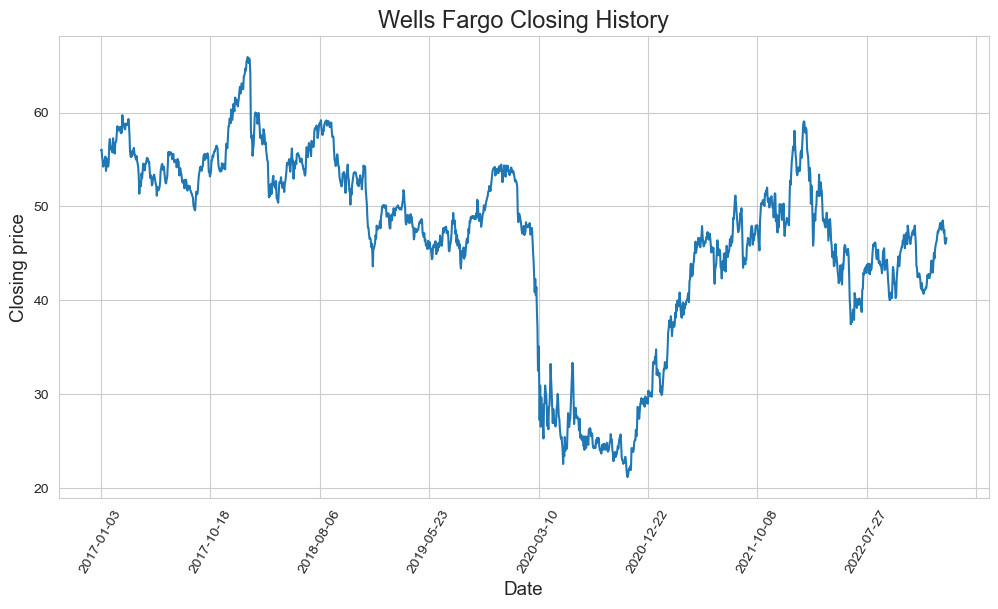

In [94]:
# plt.figure(figsize=(12, 6))
# plt.title('Wells Fargo Closing History', fontsize=17)
# WFC['close'].plot()
# plt.xticks(rotation=60)
# plt.xlabel('Date', fontsize=13.5)
# plt.ylabel('Closing price', fontsize=13.5)
# plt.show()

In [95]:
# wfc_close_df = WFC.filter(['close'])
# wfc_close_vals = wfc_close_df.values
# wfc_training_len = int(np.ceil(len(WFC)) * .95)
# wfc_training_len

1469

In [96]:
# scaler = MinMaxScaler()
# wfc_scaled_data = scaler.fit_transform(wfc_close_vals)
# wfc_scaled_data

array([[0.77829873],
       [0.77941505],
       [0.75999107],
       ...,
       [0.55525787],
       [0.56061621],
       [0.56887698]])

In [97]:
# train_data = wfc_scaled_data[:int(wfc_training_len), :]

# x_train = []
# y_train = []

# for i in range(60, len(train_data)):
#     x_train.append(train_data[i - 60: i, 0])
#     y_train.append(train_data[i, 0])
#     if i <= 61:
#         print('X_train set: ', x_train)
#         print('y_train_set: ', y_train)


# x_train, y_train = np.array(x_train), np.array(y_train)

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

X_train set:  [array([0.77829873, 0.77941505, 0.75999107, 0.75686537, 0.73900424,
       0.74748828, 0.75150703, 0.74480911, 0.7628935 , 0.72873409,
       0.73967403, 0.74659522, 0.75753516, 0.73922751, 0.74927439,
       0.7921411 , 0.80464389, 0.79147131, 0.78008484, 0.78566644,
       0.77628935, 0.77271712, 0.80665327, 0.79057825, 0.78588971,
       0.77003795, 0.79459701, 0.79749944, 0.80241125, 0.82250502,
       0.83523108, 0.82563072, 0.82496093, 0.82853315, 0.83098906,
       0.83389149, 0.81870953, 0.82429114, 0.82027238, 0.86157624,
       0.8388033 , 0.84282206, 0.83657066, 0.82964948, 0.8276401 ,
       0.83858004, 0.841929  , 0.83858004, 0.83991962, 0.8388033 ,
       0.85242242, 0.83791025, 0.81469078, 0.77494977, 0.76334003,
       0.76155392, 0.77450324, 0.76467962, 0.77740567, 0.77093101])]
y_train_set:  [0.783657066309444]
X_train set:  [array([0.77829873, 0.77941505, 0.75999107, 0.75686537, 0.73900424,
       0.74748828, 0.75150703, 0.74480911, 0.7628935 , 0.728734

(1409, 60, 1)

In [99]:
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1))) # Input Layer
# model.add(LSTM(64, return_sequences=False)) # Hidden Layer
# model.add(Dropout(.3))
# model.add(Dense(25)) # Hidden Layer
# model.add(Dropout(.3))
# model.add(Dense(1)) # Output Layer

# model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit(x_train, y_train, batch_size=10, epochs=150, verbose=1)

Epoch 1/150
141/141 [==============================] - 4s 14ms/step - loss: 0.0238
Epoch 2/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0121
Epoch 3/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0088
Epoch 4/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0086
Epoch 5/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0064
Epoch 6/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0058
Epoch 7/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0062
Epoch 8/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0057
Epoch 9/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0057
Epoch 10/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0050
Epoch 11/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0045
Epoch 12/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0040
E

In [100]:
# test_data = wfc_scaled_data[wfc_training_len - 60:, :]

# x_test = []
# y_test = wfc_close_vals[wfc_training_len: , :]
# for i in range(60, len(test_data)):
#     x_test.append(test_data[i - 60 : i, 0])

# x_test = np.array(x_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)


# rsme = np.sqrt(mean_squared_error(y_test, predictions))
# rsme


3/3 [==============================] - 1s 7ms/step


0.6720341595205497

In [101]:
# train = wfc_close_df[:wfc_training_len]
# valid = wfc_close_df[wfc_training_len:]
# valid['Predictions'] = predictions

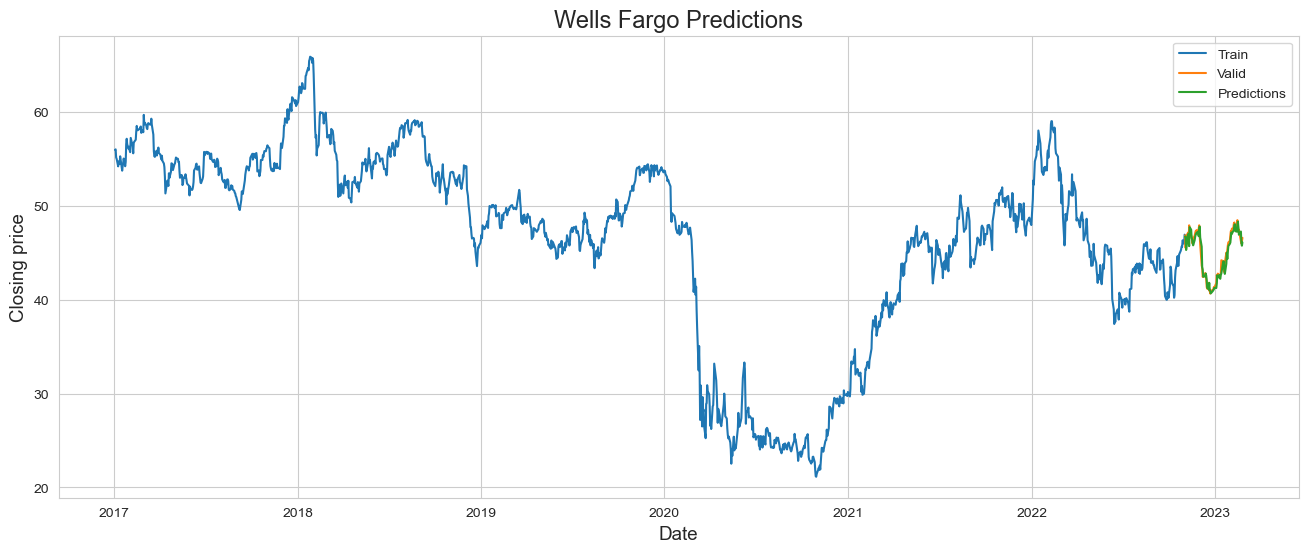

In [102]:
# plt.figure(figsize=(16, 6))
# plt.title('Wells Fargo Predictions', fontsize=17)
# plt.xlabel('Date', fontsize=13.5)
# plt.ylabel('Closing price', fontsize=13.5)
# plt.plot(np.asarray(train.index, dtype='datetime64[s]') ,train['close'])
# plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['close'])
# plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['Predictions'])
# plt.legend(['Train', 'Valid', 'Predictions'])
# plt.show()

## Predicting for Microsoft

In [103]:
MSFT

open    high      low   close    volume
date                                                 
2017-01-03   62.79   62.84   62.125   62.58  20694101
2017-01-04   62.48   62.75   62.120   62.30  21339969
2017-01-05   62.19   62.66   62.030   62.30  24875968
2017-01-06   62.30   63.15   62.040   62.84  19922919
2017-01-09   62.76   63.08   62.540   62.64  20382730
...            ...     ...      ...     ...       ...
2023-02-17  259.39  260.09  256.000  258.06  30000055
2023-02-21  254.48  255.49  251.590  252.67  28397444
2023-02-22  254.09  254.34  250.340  251.51  22491056
2023-02-23  255.56  256.84  250.480  254.77  29219095
2023-02-24  249.96  251.00  248.100  249.22  24990905

[1546 rows x 5 columns]

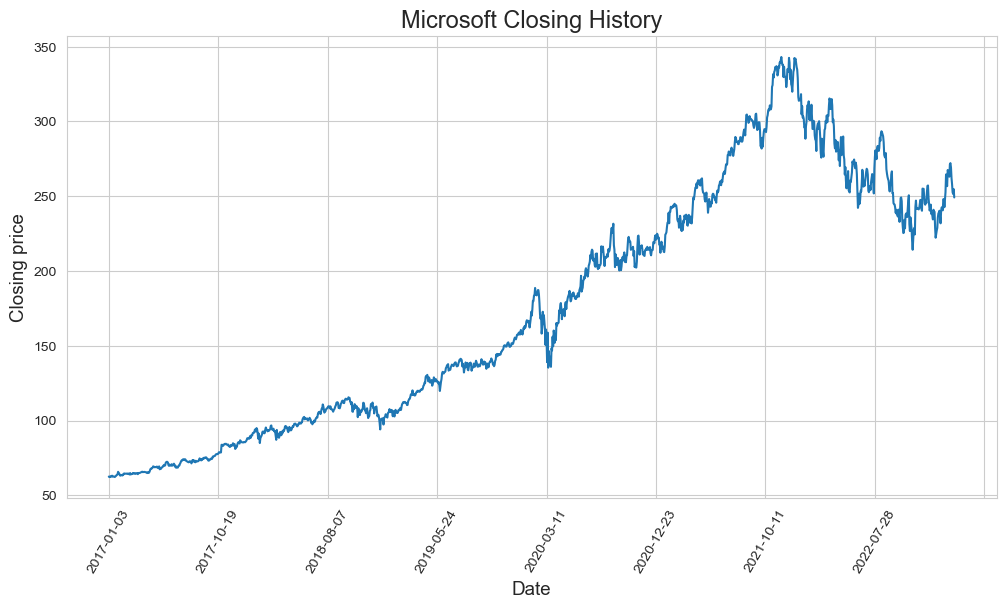

In [104]:
plt.figure(figsize=(12, 6))
plt.title('Microsoft Closing History', fontsize=17)
MSFT['close'].plot()
plt.xticks(rotation=60)
plt.xlabel('Date', fontsize=13.5)
plt.ylabel('Closing price', fontsize=13.5)
plt.show()

In [105]:
msft_close_df = MSFT.filter(['close'])
msft_close_vals = msft_close_df.values
msft_training_len = int(np.ceil(len(MSFT)) * .95)
msft_training_len

1468

In [106]:
scaler = MinMaxScaler()
msft_scaled_data = scaler.fit_transform(msft_close_vals)
msft_scaled_data

array([[0.00099712],
       [0.        ],
       [0.        ],
       ...,
       [0.67380079],
       [0.68541006],
       [0.66564581]])

In [107]:
train_data = msft_scaled_data[:int(msft_training_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print('X_train set: ', x_train)
        print('y_train_set: ', y_train)


x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

X_train set:  [array([0.00099712, 0.        , 0.        , 0.00192301, 0.00121078,
       0.00113956, 0.0031694 , 0.00110395, 0.00142445, 0.00081906,
       0.00071223, 0.        , 0.0015669 , 0.00235034, 0.00434457,
       0.00491435, 0.00701542, 0.01239272, 0.01007799, 0.00836865,
       0.00455824, 0.00309818, 0.00491435, 0.00477191, 0.00402407,
       0.00370357, 0.00626758, 0.00605392, 0.00861793, 0.00808376,
       0.00794131, 0.0079057 , 0.00826181, 0.00779887, 0.00733592,
       0.00826181, 0.00826181, 0.00687297, 0.00598269, 0.00940137,
       0.00608953, 0.0069442 , 0.00701542, 0.00747837, 0.00957943,
       0.00865354, 0.00936576, 0.00858232, 0.00751398, 0.00872476,
       0.00833304, 0.0091521 , 0.00936576, 0.00680175, 0.00972188,
       0.0091521 , 0.00954382, 0.00997115, 0.01064777, 0.01128877])]
y_train_set:  [0.012143442185107378]
X_train set:  [array([0.00099712, 0.        , 0.        , 0.00192301, 0.00121078,
       0.00113956, 0.0031694 , 0.00110395, 0.00142445, 0.000

(1408, 60, 1)

In [108]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1))) # Input Layer
model.add(LSTM(64, return_sequences=False)) # Hidden Layer
model.add(Dropout(.3))
model.add(Dense(25)) # Hidden Layer
model.add(Dropout(.3))
model.add(Dense(1)) # Output Layer

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=10, epochs=150, verbose=1)

Epoch 1/150
141/141 [==============================] - 4s 15ms/step - loss: 0.0183
Epoch 2/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0086
Epoch 3/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0068
Epoch 4/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0057
Epoch 5/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0051
Epoch 6/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0054
Epoch 7/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0050
Epoch 8/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0044
Epoch 9/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0038
Epoch 10/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0038
Epoch 11/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0036
Epoch 12/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0041
E

In [109]:
test_data = msft_scaled_data[msft_training_len - 60:, :]

x_test = []
y_test = msft_close_vals[msft_training_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60 : i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


rsme = np.sqrt(mean_squared_error(y_test, predictions))
rsme


3/3 [==============================] - 1s 9ms/step


6.529016502605248

In [110]:
train = msft_close_df[:msft_training_len]
valid = msft_close_df[msft_training_len:]
valid['Predictions'] = predictions

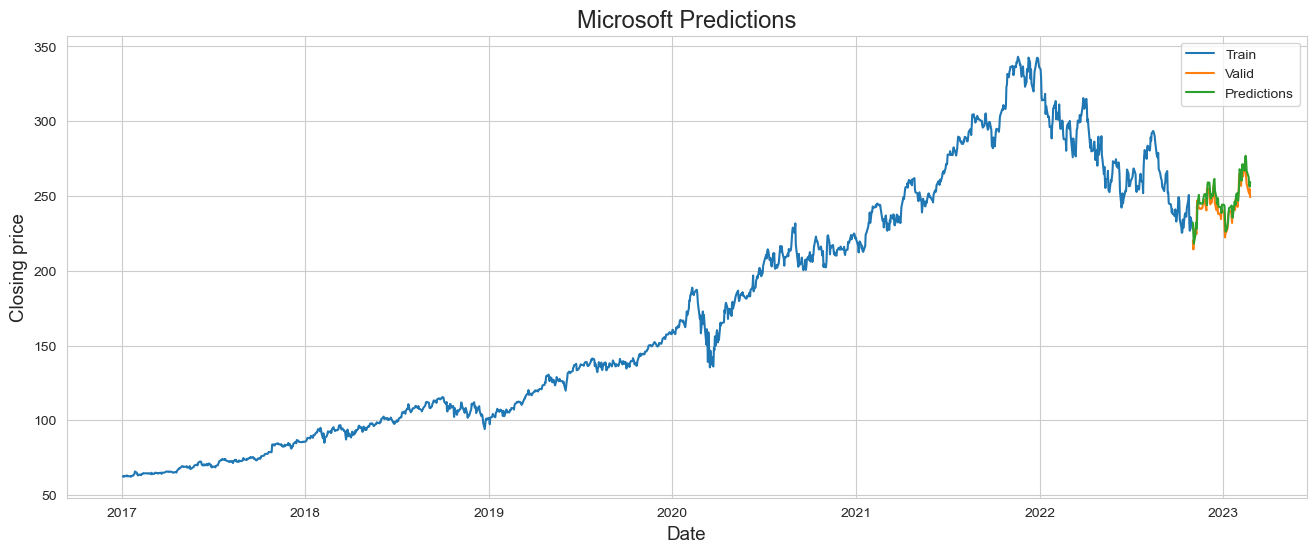

In [111]:
plt.figure(figsize=(16, 6))
plt.title('Microsoft Predictions', fontsize=17)
plt.xlabel('Date', fontsize=13.5)
plt.ylabel('Closing price', fontsize=13.5)
plt.plot(np.asarray(train.index, dtype='datetime64[s]') ,train['close'])
plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['close'])
plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['Predictions'])
plt.legend(['Train', 'Valid', 'Predictions'])
plt.show()

## Predicting for Nike

In [112]:
NKE

open     high       low   close      volume
date                                                     
2017-01-03   51.99   52.500   51.7700   51.98  13295607.0
2017-01-04   52.23   53.345   52.0900   53.07  13759473.0
2017-01-05   52.92   53.100   52.4400   53.06   8682193.0
2017-01-06   53.09   54.090   52.9800   53.91  12532449.0
2017-01-09   53.96   53.990   53.2150   53.38   8835265.0
...            ...      ...       ...     ...         ...
2023-02-17  123.71  124.890  123.4350  124.84   5161724.0
2023-02-21  123.28  124.000  120.9800  121.10   5110256.0
2023-02-22  121.10  121.395  119.6375  119.90   5021991.0
2023-02-23  120.76  120.760  118.5500  119.96   4101920.0
2023-02-24  117.97  118.740  117.3400  118.04   4693002.0

[1547 rows x 5 columns]

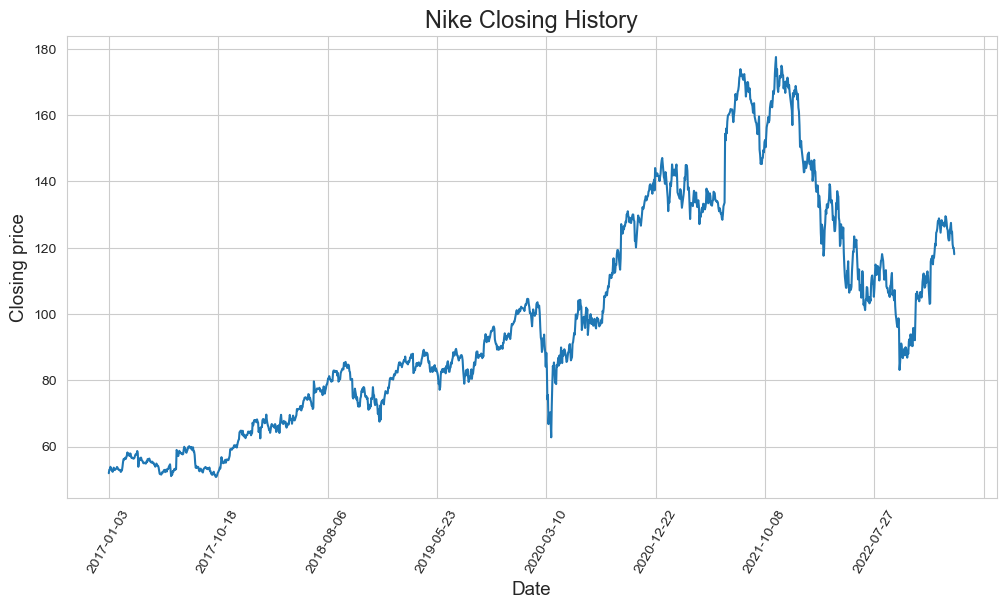

In [113]:
plt.figure(figsize=(12, 6))
plt.title('Nike Closing History', fontsize=17)
NKE['close'].plot()
plt.xticks(rotation=60)
plt.xlabel('Date', fontsize=13.5)
plt.ylabel('Closing price', fontsize=13.5)
plt.show()

In [115]:
nke_close_df = NKE.filter(['close'])
nke_close_vals = nke_close_df.values
nke_training_len = int(np.ceil(len(NKE)) * .95)
nke_training_len

1469

In [116]:
scaler = MinMaxScaler()
nke_scaled_data = scaler.fit_transform(nke_close_vals)
nke_scaled_data

array([[0.00907799],
       [0.01768235],
       [0.01760341],
       ...,
       [0.54523208],
       [0.54570572],
       [0.53054942]])

In [117]:
train_data = nke_scaled_data[:int(nke_training_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print('X_train set: ', x_train)
        print('y_train_set: ', y_train)


x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

X_train set:  [array([0.00907799, 0.01768235, 0.01760341, 0.02431323, 0.02012946,
       0.01799811, 0.01468266, 0.01239343, 0.01649826, 0.02226081,
       0.01926113, 0.0165772 , 0.01870856, 0.01902431, 0.02068203,
       0.02391853, 0.02226081, 0.01862962, 0.01776129, 0.01634039,
       0.01728765, 0.01555099, 0.01207768, 0.01555099, 0.01562993,
       0.02407641, 0.0353647 , 0.04254815, 0.04152195, 0.04436375,
       0.04586359, 0.04310073, 0.04673192, 0.05154721, 0.05849384,
       0.05178402, 0.05549416, 0.05415219, 0.04996842, 0.05620461,
       0.05502052, 0.04633723, 0.0468898 , 0.04515314, 0.04483739,
       0.0436533 , 0.04420587, 0.04610041, 0.05091569, 0.05391538,
       0.05344174, 0.05502052, 0.06196716, 0.05667824, 0.02439217,
       0.03583833, 0.0436533 , 0.04025892, 0.04570572, 0.04617935])]
y_train_set:  [0.04112724976318283]
X_train set:  [array([0.00907799, 0.01768235, 0.01760341, 0.02431323, 0.02012946,
       0.01799811, 0.01468266, 0.01239343, 0.01649826, 0.0222

(1409, 60, 1)

In [118]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1))) # Input Layer
model.add(LSTM(64, return_sequences=False)) # Hidden Layer
model.add(Dropout(.3))
model.add(Dense(25)) # Hidden Layer
model.add(Dropout(.3))
model.add(Dense(1)) # Output Layer

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=10, epochs=150, verbose=1)

Epoch 1/150
141/141 [==============================] - 4s 14ms/step - loss: 0.0148
Epoch 2/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0074
Epoch 3/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0061
Epoch 4/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0056
Epoch 5/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0050
Epoch 6/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0048
Epoch 7/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0044
Epoch 8/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0043
Epoch 9/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0040
Epoch 10/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0039
Epoch 11/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0032
Epoch 12/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0034
E

In [119]:
test_data = nke_scaled_data[nke_training_len - 60:, :]

x_test = []
y_test = nke_close_vals[nke_training_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60 : i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


rsme = np.sqrt(mean_squared_error(y_test, predictions))
rsme


3/3 [==============================] - 1s 6ms/step


3.9529332327391105

In [120]:
train = nke_close_df[:nke_training_len]
valid = nke_close_df[nke_training_len:]
valid['Predictions'] = predictions

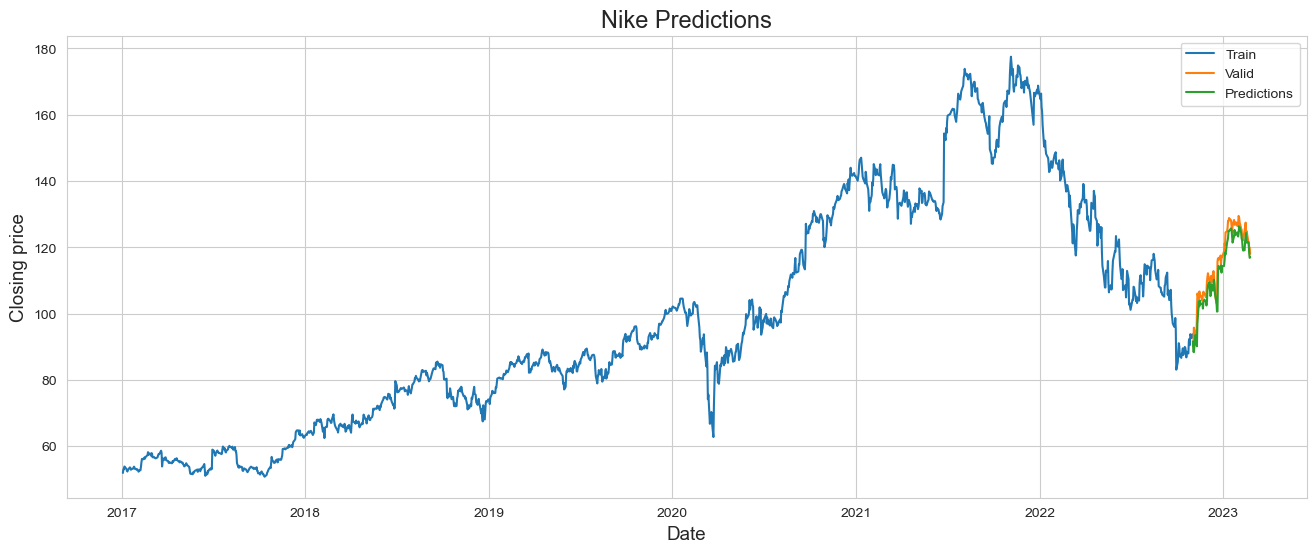

In [121]:
plt.figure(figsize=(16, 6))
plt.title('Nike Predictions', fontsize=17)
plt.xlabel('Date', fontsize=13.5)
plt.ylabel('Closing price', fontsize=13.5)
plt.plot(np.asarray(train.index, dtype='datetime64[s]') ,train['close'])
plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['close'])
plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['Predictions'])
plt.legend(['Train', 'Valid', 'Predictions'])
plt.show()

## Predicting for Walmart

In [123]:
WMT

open    high     low   close    volume
date                                                
2017-01-03   69.24   69.24   68.05   68.66  10473162
2017-01-04   68.66   69.63   68.60   69.06   7917952
2017-01-05   68.43   69.33   68.12   69.21   7099170
2017-01-06   68.41   68.50   68.01   68.26   9491115
2017-01-09   68.33   68.80   68.32   68.71   8685232
...            ...     ...     ...     ...       ...
2023-02-17  145.11  146.69  144.57  146.44   8256940
2023-02-21  142.88  148.34  142.15  147.33  18131279
2023-02-22  146.77  147.57  142.76  144.24   9947985
2023-02-23  144.37  144.37  140.71  142.09   7340419
2023-02-24  140.84  142.74  139.53  142.47   6874531

[1547 rows x 5 columns]

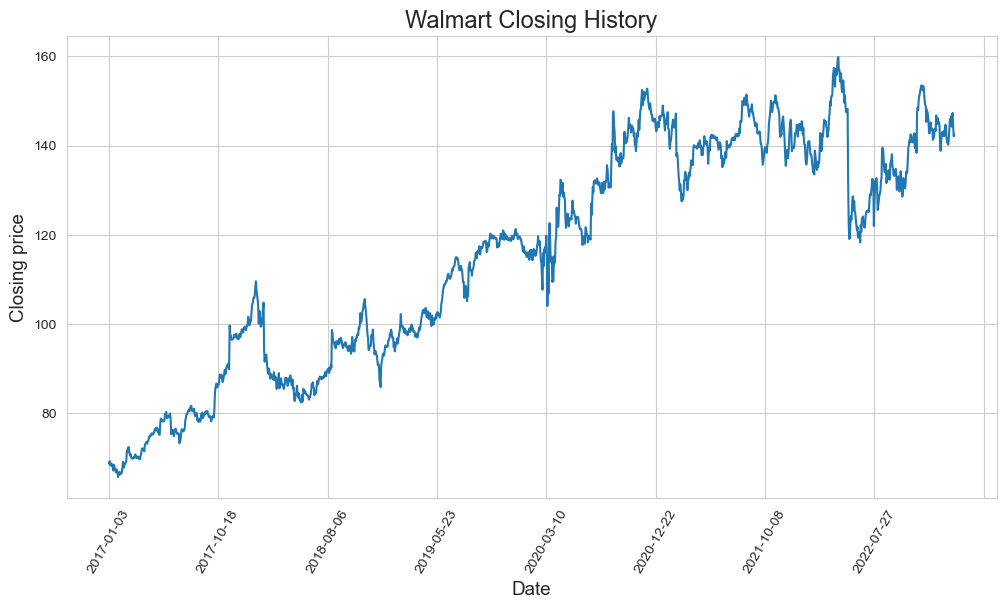

In [122]:
plt.figure(figsize=(12, 6))
plt.title('Walmart Closing History', fontsize=17)
WMT['close'].plot()
plt.xticks(rotation=60)
plt.xlabel('Date', fontsize=13.5)
plt.ylabel('Closing price', fontsize=13.5)
plt.show()

In [124]:
wmt_close_df = WMT.filter(['close'])
wmt_close_vals = wmt_close_df.values
wmt_training_len = int(np.ceil(len(WMT)) * .95)
wmt_training_len

1469

In [125]:
scaler = MinMaxScaler()
wmt_scaled_data = scaler.fit_transform(wmt_close_vals)
wmt_scaled_data

array([[0.03184375],
       [0.03608959],
       [0.03768177],
       ...,
       [0.83409405],
       [0.81127269],
       [0.81530623]])

In [126]:
train_data = wmt_scaled_data[:int(wmt_training_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print('X_train set: ', x_train)
        print('y_train_set: ', y_train)


x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

X_train set:  [array([0.03184375, 0.03608959, 0.03768177, 0.02759792, 0.03237448,
       0.02727948, 0.03046386, 0.02451969, 0.01560344, 0.02929625,
       0.02600573, 0.02080459, 0.01613417, 0.01050844, 0.01846938,
       0.01305594, 0.01135761, 0.        , 0.00806708, 0.01146375,
       0.00605031, 0.01103917, 0.00891625, 0.00785479, 0.01305594,
       0.02282136, 0.03630188, 0.02505042, 0.02239677, 0.03184375,
       0.03216219, 0.03407282, 0.03938011, 0.06145844, 0.06421824,
       0.0599724 , 0.07143615, 0.06453667, 0.05593886, 0.05084386,
       0.05413438, 0.04638573, 0.04479355, 0.0446874 , 0.04394438,
       0.04458125, 0.04712875, 0.04553657, 0.0537098 , 0.05222376,
       0.05073771, 0.04489969, 0.045855  , 0.04500584, 0.04872094,
       0.04458125, 0.04192761, 0.04245834, 0.04946396, 0.05392209])]
y_train_set:  [0.06294448572338407]
X_train set:  [array([0.03184375, 0.03608959, 0.03768177, 0.02759792, 0.03237448,
       0.02727948, 0.03046386, 0.02451969, 0.01560344, 0.0292

(1409, 60, 1)

In [128]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1))) # Input Layer
model.add(LSTM(64, return_sequences=False)) # Hidden Layer
model.add(Dropout(.3))
model.add(Dense(25)) # Hidden Layer
model.add(Dropout(.3))
model.add(Dense(1)) # Output Layer

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=10, epochs=150, verbose=1)

Epoch 1/150
141/141 [==============================] - 5s 14ms/step - loss: 0.0229
Epoch 2/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0114
Epoch 3/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0092
Epoch 4/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0080
Epoch 5/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0077
Epoch 6/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0067
Epoch 7/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0056
Epoch 8/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0049
Epoch 9/150
141/141 [==============================] - 2s 14ms/step - loss: 0.0050
Epoch 10/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0047
Epoch 11/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0041
Epoch 12/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0040
E

In [129]:
test_data = wmt_scaled_data[wmt_training_len - 60:, :]

x_test = []
y_test = wmt_close_vals[wmt_training_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60 : i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


rsme = np.sqrt(mean_squared_error(y_test, predictions))
rsme


3/3 [==============================] - 1s 8ms/step


2.0183655080631695

In [130]:
train = wmt_close_df[:wmt_training_len]
valid = wmt_close_df[wmt_training_len:]
valid['Predictions'] = predictions

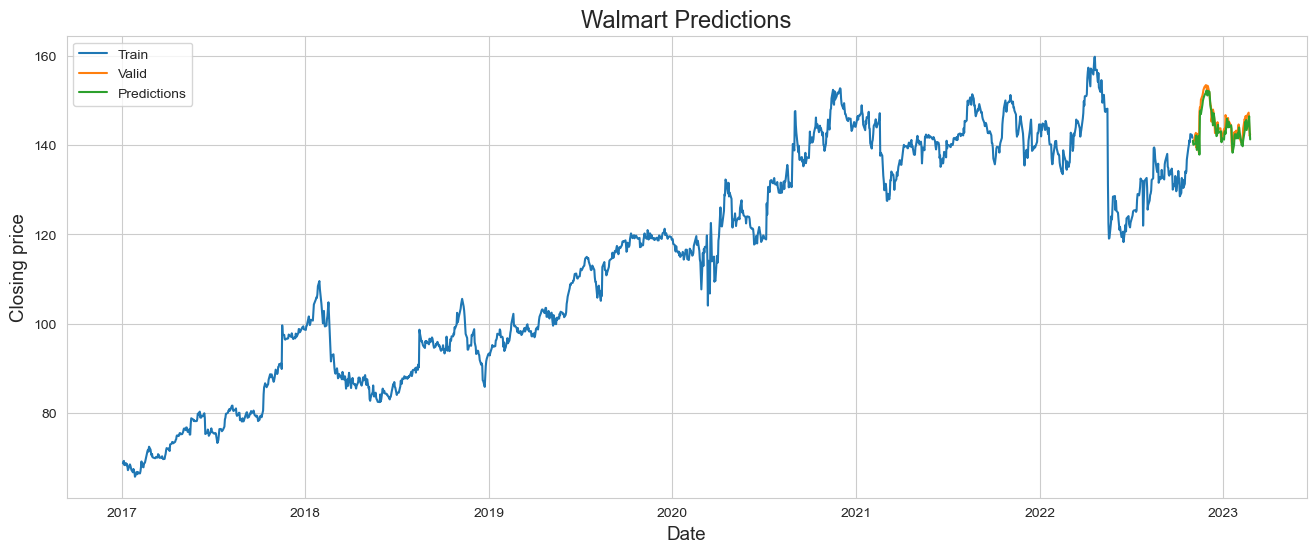

In [131]:
plt.figure(figsize=(16, 6))
plt.title('Walmart Predictions', fontsize=17)
plt.xlabel('Date', fontsize=13.5)
plt.ylabel('Closing price', fontsize=13.5)
plt.plot(np.asarray(train.index, dtype='datetime64[s]') ,train['close'])
plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['close'])
plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['Predictions'])
plt.legend(['Train', 'Valid', 'Predictions'])
plt.show()

## Predicting for Tesla

In [132]:
TSLA

open      high       low     close       volume
date                                                           
2017-01-03   14.3240   14.6887   14.0640   14.4660   88848810.0
2017-01-04   14.3167   15.2000   14.2873   15.1327  168202065.0
2017-01-05   15.0947   15.1653   14.7967   15.1167   88675425.0
2017-01-06   15.1287   15.3540   15.0300   15.2673   82918395.0
2017-01-09   15.2647   15.4613   15.2000   15.4187   59692260.0
...              ...       ...       ...       ...          ...
2023-02-17  199.9850  208.4400  197.5000  208.3100  213738549.0
2023-02-21  204.9900  209.7100  197.2200  197.3700  180018588.0
2023-02-22  197.9300  201.9900  191.7800  200.8600  191828457.0
2023-02-23  203.9100  205.1400  196.3300  202.0700  146359950.0
2023-02-24  196.3250  197.6695  192.8000  196.8800  142228105.0

[1547 rows x 5 columns]

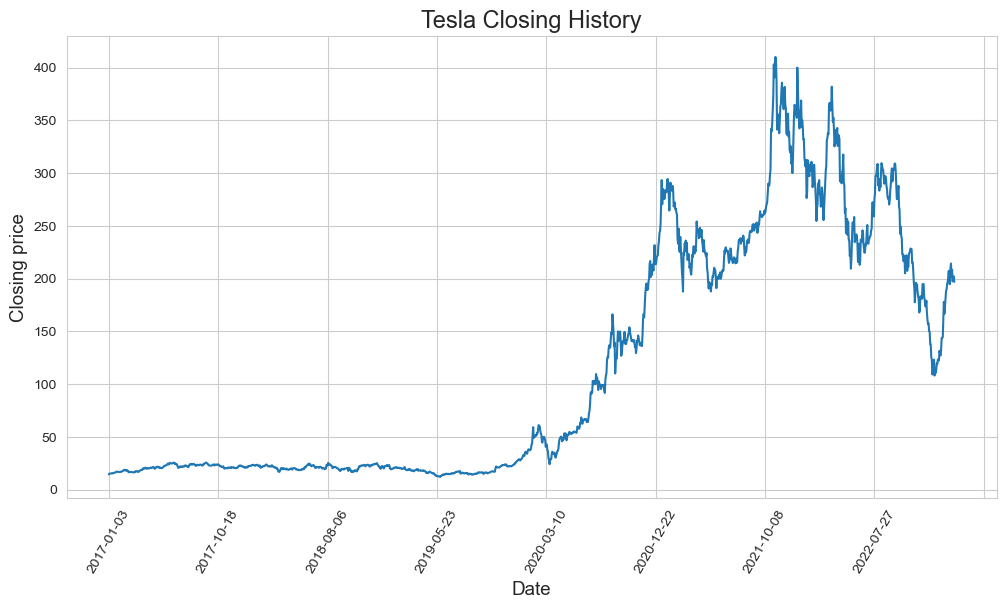

In [133]:
plt.figure(figsize=(12, 6))
plt.title('Tesla Closing History', fontsize=17)
TSLA['close'].plot()
plt.xticks(rotation=60)
plt.xlabel('Date', fontsize=13.5)
plt.ylabel('Closing price', fontsize=13.5)
plt.show()

In [134]:
tsla_close_df = TSLA.filter(['close'])
tsla_close_vals = tsla_close_df.values
tsla_training_len = int(np.ceil(len(TSLA)) * .95)
tsla_training_len

1469

In [135]:
scaler = MinMaxScaler()
tsla_scaled_data = scaler.fit_transform(tsla_close_vals)
tsla_scaled_data

array([[0.00636797],
       [0.00804294],
       [0.00800274],
       ...,
       [0.47464907],
       [0.47768898],
       [0.46465005]])

In [136]:
train_data = tsla_scaled_data[:int(tsla_training_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print('X_train set: ', x_train)
        print('y_train_set: ', y_train)


x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

X_train set:  [array([0.00636797, 0.00804294, 0.00800274, 0.00838109, 0.00876146,
       0.0085253 , 0.00850169, 0.00847832, 0.00984502, 0.00948149,
       0.00994727, 0.01085171, 0.011014  , 0.01171595, 0.01266887,
       0.0126455 , 0.01231714, 0.01239075, 0.01200235, 0.01221992,
       0.01176946, 0.01215636, 0.01211942, 0.01319821, 0.01314948,
       0.01392   , 0.0151126 , 0.01511763, 0.01702196, 0.01708552,
       0.01688127, 0.01507065, 0.01562009, 0.01648433, 0.01583439,
       0.0129    , 0.01306908, 0.01126524, 0.01189507, 0.0119001 ,
       0.01197723, 0.01215962, 0.01209933, 0.01166068, 0.01137251,
       0.01104264, 0.0108399 , 0.01125519, 0.01323665, 0.01285654,
       0.01391498, 0.01382278, 0.01389312, 0.01201064, 0.01273595,
       0.01269726, 0.01410089, 0.01528344, 0.01649438, 0.01648257])]
y_train_set:  [0.016573011619221943]
X_train set:  [array([0.00636797, 0.00804294, 0.00800274, 0.00838109, 0.00876146,
       0.0085253 , 0.00850169, 0.00847832, 0.00984502, 0.009

(1409, 60, 1)

In [137]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1))) # Input Layer
model.add(LSTM(64, return_sequences=False)) # Hidden Layer
model.add(Dropout(.3))
model.add(Dense(25)) # Hidden Layer
model.add(Dropout(.3))
model.add(Dense(1)) # Output Layer

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=10, epochs=150, verbose=1)

Epoch 1/150
141/141 [==============================] - 4s 13ms/step - loss: 0.0115
Epoch 2/150
141/141 [==============================] - 2s 13ms/step - loss: 0.0066
Epoch 3/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0059
Epoch 4/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0048
Epoch 5/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0049
Epoch 6/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0042
Epoch 7/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0037
Epoch 8/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0039
Epoch 9/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0038
Epoch 10/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0041
Epoch 11/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0037
Epoch 12/150
141/141 [==============================] - 2s 12ms/step - loss: 0.0035
E

In [138]:
test_data = tsla_scaled_data[tsla_training_len - 60:, :]

x_test = []
y_test = tsla_close_vals[tsla_training_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60 : i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


rsme = np.sqrt(mean_squared_error(y_test, predictions))
rsme


3/3 [==============================] - 1s 7ms/step


7.880326215029077

In [139]:
train = tsla_close_df[:tsla_training_len]
valid = tsla_close_df[tsla_training_len:]
valid['Predictions'] = predictions

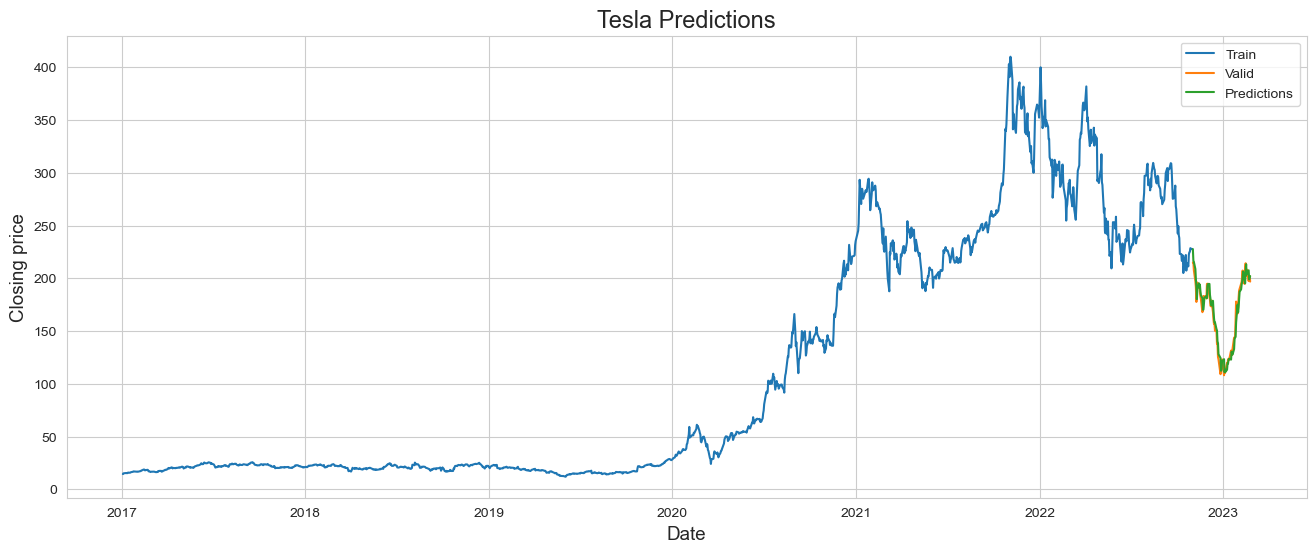

In [140]:
plt.figure(figsize=(16, 6))
plt.title('Tesla Predictions', fontsize=17)
plt.xlabel('Date', fontsize=13.5)
plt.ylabel('Closing price', fontsize=13.5)
plt.plot(np.asarray(train.index, dtype='datetime64[s]') ,train['close'])
plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['close'])
plt.plot(np.asarray(valid.index, dtype='datetime64[s]'), valid['Predictions'])
plt.legend(['Train', 'Valid', 'Predictions'])
plt.show()